In [ ]:
#Importing required packages/libraries
import numpy as np, pandas as pd

#Suppress unwanted warnings
import warnings
warnings.filterwarnings('ignore')

#Libraries/packages for plotting
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#To display 500 columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import datetime

import statsmodels.api as stm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,classification_report

In [ ]:
#Read CSV File as DataFrame
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
# Printing the shape of the dataframe
df.shape

(99999, 226)

In [ ]:
# Info of the dataframe does not provide the details all the columns as it is a huge data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [ ]:
# Listing the columns in a list to look at the different variables
list(df.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [ ]:
# Describing the dataframe to look at the numerical data distribution across th numerical variables
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [ ]:
#Convert into correct data types for few of the categorical variables
for i in ['night_pck_user_6','night_pck_user_7','night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']:
  df[i] = df[i].astype('object')

In [ ]:
# Dividing the variables into categorical variable list and numerical variable list to work on them seperately with better understanding
cat_cols = []
num_cols = []
id_cols = ['mobile_number','circle_id']

for i in df.columns:
  if(df[i].dtype == 'object'):
    cat_cols.append(i)
  else:
    num_cols.append(i)

In [ ]:
# Printing all the categorical columns
cat_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [ ]:
# Printing all the numerical columns
num_cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [ ]:
# Printing the information of the categorical columns and looking at the not null count for each categorical variable
print(df[cat_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
date_of_last_rech_6         98392 non-null object
date_of_last_rech_7         98232 non-null object
date_of_last_rech_8         96377 non-null object
date_of_last_rech_9         95239 non-null object
date_of_last_rech_data_6    25153 non-null object
date_of_last_rech_data_7    25571 non-null object
date_of_last_rech_data_8    26339 non-null object
date_of_last_rech_data_9    25922 non-null object
night_pck_user_6            25153 non-null object
night_pck_user_7            25571 non-null object
night_pck_user_8            26339 non-null object
night_pck_user_9            25922 non-null object
fb_user_6                   25153 non-null object
fb_user_7                   25571 non-nul

In [ ]:
# Printing the information of the numerical columns and looking at the not null count for each categorical variable
print(df[num_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 206 entries, mobile_number to sep_vbc_3g
dtypes: float64(171), int64(35)
memory usage: 157.2 MB
None


In [ ]:
# As the numerical column info is still not seen, diving the numerical columns into two list with more than 50% null values as 'high_missing_values_cols'
# and less than 50% null values as 'low_missing_values_cols' and priting them aong with the null count, percentage of null count and mean , median values
high_missing_values_cols = []
low_missing_values_cols = []

for i in num_cols:
  if((round((round((df[i].isnull().sum()/len(df[i]))*100,2))>50))):
    print(i+" : "+str(df[i].isnull().sum()))
    print(i+" : "+str(round((df[i].isnull().sum()/len(df[i]))*100,2)))
    print(df[i].mean(), df[i].median())
    print("\n")
    high_missing_values_cols.append(i)
  if((round((round((df[i].isnull().sum()/len(df[i]))*100,2))<=50)) and ((round((round((df[i].isnull().sum()/len(df[i]))*100,2))>0)))):
    print(i+" : "+str(df[i].isnull().sum()))
    print(i+" : "+str(round((df[i].isnull().sum()/len(df[i]))*100,2)))
    print(df[i].mean(), df[i].median())
    print("\n")
    low_missing_values_cols.append(i)

loc_og_t2o_mou : 1018
loc_og_t2o_mou : 1.02
0.0 0.0


std_og_t2o_mou : 1018
std_og_t2o_mou : 1.02
0.0 0.0


loc_ic_t2o_mou : 1018
loc_ic_t2o_mou : 1.02
0.0 0.0


onnet_mou_6 : 3937
onnet_mou_6 : 3.94
132.39587453937398 34.31


onnet_mou_7 : 3859
onnet_mou_7 : 3.86
133.6708049719308 32.33


onnet_mou_8 : 5378
onnet_mou_8 : 5.38
133.01809788526194 32.36


onnet_mou_9 : 7745
onnet_mou_9 : 7.75
130.30232737877316 29.84


offnet_mou_6 : 3937
offnet_mou_6 : 3.94
197.93557723138093 96.31


offnet_mou_7 : 3859
offnet_mou_7 : 3.86
197.0451332431926 91.735


offnet_mou_8 : 5378
offnet_mou_8 : 5.38
196.57480284504308 92.14


offnet_mou_9 : 7745
offnet_mou_9 : 7.75
190.3372221258814 87.29


roam_ic_mou_6 : 3937
roam_ic_mou_6 : 3.94
9.950013324727992 0.0


roam_ic_mou_7 : 3859
roam_ic_mou_7 : 3.86
7.149898481381532 0.0


roam_ic_mou_8 : 5378
roam_ic_mou_8 : 5.38
7.292981050718291 0.0


roam_ic_mou_9 : 7745
roam_ic_mou_9 : 7.75
6.343840700674353 0.0


roam_og_mou_6 : 3937
roam_og_mou_6 : 3.94
13.911

arpu_3g_6 : 74.85
89.55505705084717 0.48


arpu_3g_7 : 74428
arpu_3g_7 : 74.43
89.38412029251722 0.42


arpu_3g_8 : 73660
arpu_3g_8 : 73.66
91.17384942480534 0.88


arpu_3g_9 : 74077
arpu_3g_9 : 74.08
100.26411619473562 2.605


arpu_2g_6 : 74846
arpu_2g_6 : 74.85
86.39800341907414 10.83


arpu_2g_7 : 74428
arpu_2g_7 : 74.43
85.91444996284683 8.81


arpu_2g_8 : 73660
arpu_2g_8 : 73.66
86.5994783401016 9.27


arpu_2g_9 : 74077
arpu_2g_9 : 74.08
93.71202646400421 14.8




In [ ]:
# Printing the lsit of columns that have more than 50% of null values
high_missing_values_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [ ]:
# Looking at the data distribution of columns that have more than 50% of null values
df[['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


In [ ]:
# Dropping the columns that does not make any sence with greater amount of missing values.
df.drop(columns=['max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9'], inplace=True)

In [ ]:
# Imputing the total reacharge data and recharge amount columns null values to 0 as they are not actual missing values but null explains that they did make any of this.

for i in ['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']:
  df[i].fillna(value=0, inplace=True)
 

In [ ]:
# Printing the lsit of columns that have less than 50% of null values

low_missing_values_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

#### Imputing the null values

In [ ]:
# Imputing the minutes of usage columns that are having null values for each month seperately by analyzing the remaing mou columns of that month.

# Analyzing the 6th month minute of usage columns
for i in ['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']:
  print(i+" = "+str(df[i].isnull().sum()))

#'total_og_mou_6', 'total_ic_mou_6' columns have no null values.
#So, comparing with them helped us fill the empty 'mou' columns with 0 as the value
for i in ['total_og_mou_6', 'total_ic_mou_6']:
  print("\nValue Counts in "+i+"\n"+str(df[i][df['onnet_mou_6'].isnull()].value_counts(dropna=True)))


# Describing the data for the 6th month mou columns
df[['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].describe()

onnet_mou_6 = 3937
offnet_mou_6 = 3937
roam_ic_mou_6 = 3937
roam_og_mou_6 = 3937
roam_og_mou_6 = 3937
loc_og_t2t_mou_6 = 3937
loc_og_t2m_mou_6 = 3937
loc_og_t2f_mou_6 = 3937
loc_og_t2c_mou_6 = 3937
loc_og_mou_6 = 3937
std_og_t2t_mou_6 = 3937
std_og_t2m_mou_6 = 3937
std_og_t2f_mou_6 = 3937
std_og_t2c_mou_6 = 3937
std_og_mou_6 = 3937
isd_og_mou_6 = 3937
spl_og_mou_6 = 3937
og_others_6 = 3937
loc_ic_t2t_mou_6 = 3937
loc_ic_t2m_mou_6 = 3937
loc_ic_t2f_mou_6 = 3937
loc_ic_mou_6 = 3937
std_ic_t2t_mou_6 = 3937
std_ic_t2m_mou_6 = 3937
std_ic_t2f_mou_6 = 3937
std_ic_t2o_mou_6 = 3937
std_ic_mou_6 = 3937
spl_ic_mou_6 = 3937
isd_ic_mou_6 = 3937
ic_others_6 = 3937

Value Counts in total_og_mou_6
0.0    3937
Name: total_og_mou_6, dtype: int64

Value Counts in total_ic_mou_6
0.0    3937
Name: total_ic_mou_6, dtype: int64


,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2c_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2o_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
count,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.0,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.0,96062.000000,96062.000000,96062.000000,96062.000000
mean,132.395875,197.935577,9.950013,13.911337,13.911337,47.100763,93.342088,3.751013,1.123056,144.201175,79.829870,87.299624,1.129011,0.0,168.261218,0.798277,3.916811,0.454157,47.922365,107.475650,12.084305,167.491059,9.575993,20.722240,2.156397,0.0,32.457179,0.061557,7.460608,0.854656
std,297.207406,316.851613,72.825411,71.443196,71.443196,150.856393,162.780544,14.230438,5.448946,251.751489,252.476533,255.617850,7.984970,0.0,389.948499,25.765248,14.936449,4.125911,140.258485,171.713903,40.140895,254.124029,54.330607,80.793414,16.495594,0.0,106.283386,0.160920,59.722948,11.955164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,7.380000,34.730000,0.000000,0.000000,0.000000,1.660000,9.880000,0.000000,0.000000,17.110000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.990000,17.290000,0.000000,30.390000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,34.310000,96.310000,0.000000,0.000000,0.000000,11.910000,41.030000,0.000000,0.000000,65.110000,0.000000,3.950000,0.000000,0.0,11.640000,0.000000,0.000000,0.000000,15.690000,56.490000,0.880000,92.160000,0.000000,2.030000,0.000000,0.0,5.890000,0.000000,0.000000,0.000000
75%,118.740000,231.860000,0.000000,0.000000,0.000000,40.960000,110.390000,2.080000,0.000000,168.270000,30.807500,53.290000,0.000000,0.0,144.837500,0.000000,2.430000,0.000000,46.840000,132.387500,8.140000,208.075000,4.060000,15.030000,0.000000,0.0,26.930000,0.000000,0.000000,0.000000
max,7376.710000,8362.360000,13724.380000,3775.110000,3775.110000,6431.330000,4729.740000,1466.030000,342.860000,10643.380000,7366.580000,8314.760000,628.560000,0.0,8432.990000,5900.660000,1023.210000,800.890000,6626.930000,4693.860000,1872.340000,7454.630000,5459.560000,5647.160000,1351.110000,0.0,5712.110000,19.760000,6789.410000,1362.940000


In [ ]:
# Based on the above data since the total_mou for the 6th month having no null values have exactly same amount 0's, imputing the null values of remaining columns
# to 0's for this month
for i in ['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6',
'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']:
  df[i].fillna(value=0, inplace=True)

In [ ]:
# Imputing the minutes of usage columns that are having null values for each month seperately by analyzing the remaing mou columns of that month.

# Analyzing the 7th month minute of usage columns
for i in ['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']:
  print(i+" = "+str(df[i].isnull().sum()))

#'total_og_mou_7', 'total_ic_mou_7' columns have no null values.
#So, comparing with them helped us fill the empty 'mou' columns with 0 as the value
for i in ['total_og_mou_7', 'total_ic_mou_7']:
  print("\nValue Counts in "+i+"\n"+str(df[i][df['onnet_mou_7'].isnull()].value_counts(dropna=True)))

# Describing the data for the 7th month mou columns
df[['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].describe()

onnet_mou_7 = 3859
offnet_mou_7 = 3859
roam_ic_mou_7 = 3859
roam_og_mou_7 = 3859
roam_og_mou_7 = 3859
loc_og_t2t_mou_7 = 3859
loc_og_t2m_mou_7 = 3859
loc_og_t2f_mou_7 = 3859
loc_og_t2c_mou_7 = 3859
loc_og_mou_7 = 3859
std_og_t2t_mou_7 = 3859
std_og_t2m_mou_7 = 3859
std_og_t2f_mou_7 = 3859
std_og_t2c_mou_7 = 3859
std_og_mou_7 = 3859
isd_og_mou_7 = 3859
spl_og_mou_7 = 3859
og_others_7 = 3859
loc_ic_t2t_mou_7 = 3859
loc_ic_t2m_mou_7 = 3859
loc_ic_t2f_mou_7 = 3859
loc_ic_mou_7 = 3859
std_ic_t2t_mou_7 = 3859
std_ic_t2m_mou_7 = 3859
std_ic_t2f_mou_7 = 3859
std_ic_t2o_mou_7 = 3859
std_ic_mou_7 = 3859
spl_ic_mou_7 = 3859
isd_ic_mou_7 = 3859
ic_others_7 = 3859

Value Counts in total_og_mou_7
0.0    3859
Name: total_og_mou_7, dtype: int64

Value Counts in total_ic_mou_7
0.0    3859
Name: total_ic_mou_7, dtype: int64


,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_t2o_mou_7,std_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7
count,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.0,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.0,96140.000000,96140.000000,96140.000000,96140.000000
mean,133.670805,197.045133,7.149898,9.818732,9.818732,46.473010,91.397131,3.792985,1.368500,141.670476,83.299598,90.804137,1.115010,0.0,175.221436,0.776572,4.978279,0.030235,47.990520,107.120493,12.599697,167.719540,10.011904,21.656415,2.216923,0.0,33.887833,0.033585,8.334936,1.012960
std,308.794148,325.862803,73.447948,58.455762,58.455762,155.318705,157.492308,14.264986,7.533445,248.731086,263.631042,269.347911,8.599406,0.0,408.922934,25.603052,20.661570,2.161717,145.795055,169.423620,42.977442,256.242707,57.411971,86.521393,16.454061,0.0,113.720168,0.155725,65.219829,12.673099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6.660000,32.190000,0.000000,0.000000,0.000000,1.630000,10.025000,0.000000,0.000000,17.480000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.230000,18.590000,0.000000,32.460000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,32.330000,91.735000,0.000000,0.000000,0.000000,11.610000,40.430000,0.000000,0.000000,63.685000,0.000000,3.635000,0.000000,0.0,11.090000,0.000000,0.000000,0.000000,15.740000,57.080000,0.930000,92.550000,0.000000,2.040000,0.000000,0.0,5.960000,0.000000,0.000000,0.000000
75%,115.595000,226.815000,0.000000,0.000000,0.000000,39.910000,107.560000,2.090000,0.000000,164.382500,31.132500,54.040000,0.000000,0.0,150.615000,0.000000,3.710000,0.000000,45.810000,130.960000,8.282500,205.837500,4.230000,15.740000,0.000000,0.0,28.310000,0.000000,0.000000,0.000000
max,8157.780000,9667.130000,15371.040000,2812.040000,2812.040000,7400.660000,4557.140000,1196.430000,916.240000,7674.780000,8133.660000,9284.740000,544.630000,0.0,10936.730000,5490.280000,2372.510000,370.130000,9324.660000,4455.830000,1983.010000,9669.910000,5800.930000,6141.880000,1136.080000,0.0,6745.760000,21.330000,5289.540000,1495.940000


In [ ]:
# Based on the above data since the total_mou for the 7th month having no null values have exactly same amount 0's, imputing the null values of remaining columns
# to 0's for this month
for i in ['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']:
  df[i].fillna(value=0, inplace=True)

In [ ]:
# Imputing the minutes of usage columns that are having null values for each month seperately by analyzing the remaing mou columns of that month.

# Analyzing the 8th month minute of usage columns
for i in ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']:
  print(i+" = "+str(df[i].isnull().sum()))

#'total_og_mou_8', 'total_ic_mou_8' columns have no null values.
#So, comparing with them helped us fill the empty 'mou' columns with 0 as the value
for i in ['total_og_mou_8', 'total_ic_mou_8']:
  print("\nValue Counts in "+i+"\n"+str(df[i][df['onnet_mou_8'].isnull()].value_counts(dropna=True)))

# Describing the data for the 8th month mou columns
df[['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].describe()

onnet_mou_8 = 5378
offnet_mou_8 = 5378
roam_ic_mou_8 = 5378
roam_og_mou_8 = 5378
roam_og_mou_8 = 5378
loc_og_t2t_mou_8 = 5378
loc_og_t2m_mou_8 = 5378
loc_og_t2f_mou_8 = 5378
loc_og_t2c_mou_8 = 5378
loc_og_mou_8 = 5378
std_og_t2t_mou_8 = 5378
std_og_t2m_mou_8 = 5378
std_og_t2f_mou_8 = 5378
std_og_t2c_mou_8 = 5378
std_og_mou_8 = 5378
isd_og_mou_8 = 5378
spl_og_mou_8 = 5378
og_others_8 = 5378
loc_ic_t2t_mou_8 = 5378
loc_ic_t2m_mou_8 = 5378
loc_ic_t2f_mou_8 = 5378
loc_ic_mou_8 = 5378
std_ic_t2t_mou_8 = 5378
std_ic_t2m_mou_8 = 5378
std_ic_t2f_mou_8 = 5378
std_ic_t2o_mou_8 = 5378
std_ic_mou_8 = 5378
spl_ic_mou_8 = 5378
isd_ic_mou_8 = 5378
ic_others_8 = 5378

Value Counts in total_og_mou_8
0.0    5378
Name: total_og_mou_8, dtype: int64

Value Counts in total_ic_mou_8
0.0    5378
Name: total_ic_mou_8, dtype: int64


,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8
count,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.0,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.0,94621.000000,94621.000000,94621.000000,94621.000000
mean,133.018098,196.574803,7.292981,9.971890,9.971890,45.887806,91.755128,3.677991,1.433821,141.328209,83.282673,89.838390,1.067792,0.0,174.191498,0.791247,5.053769,0.033372,47.211362,108.460515,11.751834,167.432575,9.883921,21.183211,2.085004,0.0,33.154735,0.040361,8.442001,0.970800
std,308.951589,327.170662,68.402466,64.713221,64.713221,151.184830,156.537048,13.270996,6.783335,245.914311,265.486090,271.757783,7.905971,0.0,411.633049,25.544471,17.855111,2.323464,137.239552,169.723759,39.125379,250.025523,55.073186,83.683565,15.812580,0.0,110.127008,0.146147,63.813098,13.284348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,6.460000,31.630000,0.000000,0.000000,0.000000,1.600000,9.810000,0.000000,0.000000,17.110000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.280000,18.930000,0.000000,32.740000,0.000000,0.000000,0.000000,0.0,0.010000,0.000000,0.000000,0.000000
50%,32.360000,92.140000,0.000000,0.000000,0.000000,11.730000,40.360000,0.000000,0.000000,63.730000,0.000000,3.310000,0.000000,0.0,10.410000,0.000000,0.000000,0.000000,16.030000,58.240000,0.930000,93.830000,0.000000,2.030000,0.000000,0.0,5.880000,0.000000,0.000000,0.000000
75%,115.860000,228.260000,0.000000,0.000000,0.000000,40.110000,109.090000,2.040000,0.000000,166.110000,30.580000,52.490000,0.000000,0.0,147.940000,0.000000,3.990000,0.000000,46.290000,133.930000,8.110000,207.280000,4.080000,15.360000,0.000000,0.0,27.710000,0.000000,0.000000,0.000000
max,10752.560000,14007.340000,13095.360000,5337.040000,5337.040000,10752.560000,4961.330000,928.490000,502.090000,11039.910000,8014.430000,13950.040000,516.910000,0.0,13980.060000,5681.540000,1390.880000,394.930000,10696.230000,6274.190000,2433.060000,10830.160000,4309.290000,5645.860000,1394.890000,0.0,5957.140000,16.860000,4127.010000,2327.510000


In [ ]:
# Based on the above data since the total_mou for the 8th month having no null values have exactly same amount 0's, imputing the null values of remaining columns
# to 0's for this month
for i in ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']:
  df[i].fillna(value=0, inplace=True)

In [ ]:
# Imputing the minutes of usage columns that are having null values for each month seperately by analyzing the remaing mou columns of that month.

# Analyzing the 9th month minute of usage columns
for i in ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']:
  print(i+" = "+str(df[i].isnull().sum()))

#'total_og_mou_9', 'total_ic_mou_9' columns have no null values.
#So, comparing with them helped us fill the empty 'mou' columns with 0 as the value
for i in ['total_og_mou_9', 'total_ic_mou_9']:
  print("\nValue Counts in "+i+"\n"+str(df[i][df['onnet_mou_9'].isnull()].value_counts(dropna=True)))

# Describing the data for the 9th month mou columns
df[['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']].describe()

onnet_mou_9 = 0
offnet_mou_9 = 0
roam_ic_mou_9 = 0
roam_og_mou_9 = 0
roam_og_mou_9 = 0
loc_og_t2t_mou_9 = 0
loc_og_t2m_mou_9 = 0
loc_og_t2f_mou_9 = 0
loc_og_t2c_mou_9 = 0
loc_og_mou_9 = 0
std_og_t2t_mou_9 = 0
std_og_t2m_mou_9 = 0
std_og_t2f_mou_9 = 0
std_og_t2c_mou_9 = 0
std_og_mou_9 = 0
isd_og_mou_9 = 0
spl_og_mou_9 = 0
og_others_9 = 0
loc_ic_t2t_mou_9 = 0
loc_ic_t2m_mou_9 = 0
loc_ic_t2f_mou_9 = 0
loc_ic_mou_9 = 0
std_ic_t2t_mou_9 = 0
std_ic_t2m_mou_9 = 0
std_ic_t2f_mou_9 = 0
std_ic_t2o_mou_9 = 0
std_ic_mou_9 = 0
spl_ic_mou_9 = 0
isd_ic_mou_9 = 0
ic_others_9 = 0

Value Counts in total_og_mou_9
Series([], Name: total_og_mou_9, dtype: int64)

Value Counts in total_ic_mou_9
Series([], Name: total_ic_mou_9, dtype: int64)


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,120.210311,175.595457,5.852505,7.892887,7.892887,41.131346,83.456748,3.372031,1.137250,127.966775,75.965396,79.594431,0.96163,0.0,156.523822,0.667826,4.070995,0.043780,42.697233,97.933648,11.230289,151.869401,8.701927,18.101258,2.005086,0.0,28.810607,0.150502,7.438517,0.938382
std,298.331154,310.968398,54.906445,56.176090,56.176090,142.647378,154.318922,12.962767,5.407085,239.110873,257.571734,252.137138,7.94027,0.0,391.767133,20.469760,15.727458,3.491866,135.161962,161.467756,42.234334,243.975763,51.329546,72.144421,15.358340,0.0,98.308442,0.508878,61.034593,11.895147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.190000,16.030000,0.000000,0.000000,0.000000,0.250000,4.010000,0.000000,0.000000,7.640000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,1.440000,11.430000,0.000000,20.740000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,23.840000,74.680000,0.000000,0.000000,0.000000,8.860000,32.480000,0.000000,0.000000,51.960000,0.000000,1.010000,0.00000,0.0,4.580000,0.000000,0.000000,0.000000,12.860000,48.580000,0.580000,79.560000,0.000000,0.960000,0.000000,0.0,3.810000,0.000000,0.000000,0.000000
75%,99.090000,202.830000,0.000000,0.000000,0.000000,35.290000,98.040000,1.530000,0.000000,149.360000,20.910000,39.540000,0.00000,0.0,115.100000,0.000000,2.660000,0.000000,41.270000,121.040000,6.960000,188.900000,2.700000,12.360000,0.000000,0.0,22.660000,0.010000,0.000000,0.000000
max,10427.460000,10310.760000,8464.030000,4428.460000,4428.460000,10389.240000,4429.880000,927.410000,339.840000,11099.260000,9382.580000,10223.430000,808.49000,0.0,11495.310000,4244.530000,1635.710000,787.790000,10598.830000,5463.780000,4318.280000,10796.290000,3819.830000,5689.760000,1431.960000,0.0,5956.660000,62.380000,5057.740000,1005.230000


In [ ]:
# Based on the above data since the total_mou for the 8th month having no null values have exactly same amount 0's, imputing the null values of remaining columns
# to 0's for this month
for i in ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']:
  df[i].fillna(value=0, inplace=True)

In [ ]:
# Now checking the not null column count for the remaining columns
for i in df.columns:
  if(df[i].isnull().sum()>0):
    print(i+" : "+str(df[i].isnull().sum()))

loc_og_t2o_mou : 1018
std_og_t2o_mou : 1018
loc_ic_t2o_mou : 1018
last_date_of_month_7 : 601
last_date_of_month_8 : 1100
last_date_of_month_9 : 1659
date_of_last_rech_6 : 1607
date_of_last_rech_7 : 1767
date_of_last_rech_8 : 3622
date_of_last_rech_9 : 4760
date_of_last_rech_data_6 : 74846
date_of_last_rech_data_7 : 74428
date_of_last_rech_data_8 : 73660
date_of_last_rech_data_9 : 74077
night_pck_user_6 : 74846
night_pck_user_7 : 74428
night_pck_user_8 : 73660
night_pck_user_9 : 74077
fb_user_6 : 74846
fb_user_7 : 74428
fb_user_8 : 73660
fb_user_9 : 74077


In [ ]:
# Imputing the night_pach_user and fb_user categorical columns null values to a different category called '-1' as they are meaning ful missing values.
for i in ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']:
  df[i].fillna(value="-1", inplace=True)

In [ ]:
#Removing the below columns as the month is not mentioned and it has a single value throughout the column
#Which is very higly skewed data
print(df['loc_og_t2o_mou'].value_counts(dropna=False))
print(df['std_og_t2o_mou'].value_counts(dropna=False))
print(df['loc_ic_t2o_mou'].value_counts(dropna=False))

df.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], inplace=True)

0.0    98981
NaN     1018
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
NaN     1018
Name: std_og_t2o_mou, dtype: int64
0.0    98981
NaN     1018
Name: loc_ic_t2o_mou, dtype: int64


In [ ]:
#Dropping the columns as they are higly skewed
df.drop(columns=['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], inplace=True)

In [ ]:
# Now checking the not null column count for the remaining columns

for i in df.columns:
  if(df[i].isnull().sum()>0):
    print(i+" : "+str(df[i].isnull().sum()))

date_of_last_rech_6 : 1607
date_of_last_rech_7 : 1767
date_of_last_rech_8 : 3622
date_of_last_rech_9 : 4760
date_of_last_rech_data_6 : 74846
date_of_last_rech_data_7 : 74428
date_of_last_rech_data_8 : 73660
date_of_last_rech_data_9 : 74077


In [ ]:
#Dropping the columns as they are higly skewed if imputed nad has high null values

df.drop(columns=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], inplace=True)

In [ ]:
# Now checking the skewness of the data by looking at the unique value counts for the categorical and numerical columns
for i in df.columns:
  if(df[i].nunique()<=10):
    print(i+" : "+str(df[i].nunique()))

circle_id : 1
last_date_of_month_6 : 1
std_og_t2c_mou_6 : 1
std_og_t2c_mou_7 : 1
std_og_t2c_mou_8 : 1
std_og_t2c_mou_9 : 1
std_ic_t2o_mou_6 : 1
std_ic_t2o_mou_7 : 1
std_ic_t2o_mou_8 : 1
std_ic_t2o_mou_9 : 1
night_pck_user_6 : 3
night_pck_user_7 : 3
night_pck_user_8 : 3
night_pck_user_9 : 3
monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_2g_9 : 5
fb_user_6 : 3
fb_user_7 : 3
fb_user_8 : 3
fb_user_9 : 3


In [ ]:
#Dropping the columns as they are higly skewed if imputed nad has high null values

df.drop(columns=['circle_id', 'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], inplace=True)

In [ ]:
# Now check the shape of the dataframe
df.shape

(99999, 186)

In [ ]:
# Dividing the variables into new categorical variable list and numerical variable list to work on them seperately with better understanding

cat_cols1= []
num_cols1 = []


for i in df.columns:
  if(df[i].dtype == 'object'):
    cat_cols1.append(i)
  else:
    num_cols1.append(i)

In [ ]:
# View the remaining categorical columns
cat_cols1

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [ ]:
# Removing the 'mobile_number' , 'aon' columns for the new numerical columns list to perform some EDA, as they are unique data
num_cols1.remove('mobile_number')
num_cols1.remove('aon')
num_cols1

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

In [ ]:
# Looking at teh skewness of the numerical columns that have more 70% of teh data skewed
for i in num_cols1:
  if(df[i].value_counts(normalize=True)[0]>=0.7):
    print("Value counts of columns "+i+"\n"+str(df[i].value_counts(normalize=True))+"\n")
    #df.drop(columns=i, inplace=True)

Value counts of columns roam_ic_mou_6
0.00      0.806848
1.01      0.000780
0.71      0.000470
0.30      0.000430
0.15      0.000380
            ...   
32.64     0.000010
131.44    0.000010
290.24    0.000010
28.95     0.000010
38.18     0.000010
Name: roam_ic_mou_6, Length: 6512, dtype: float64

Value counts of columns roam_ic_mou_7
0.00      0.851539
1.01      0.000790
0.20      0.000440
0.03      0.000380
0.51      0.000380
            ...   
711.11    0.000010
127.78    0.000010
75.26     0.000010
45.83     0.000010
588.86    0.000010
Name: roam_ic_mou_7, Length: 5230, dtype: float64

Value counts of columns roam_ic_mou_8
0.00     0.855479
1.01     0.000640
0.25     0.000380
0.28     0.000360
0.68     0.000340
           ...   
36.11    0.000010
28.95    0.000010
77.84    0.000010
40.19    0.000010
99.01    0.000010
Name: roam_ic_mou_8, Length: 5315, dtype: float64

Value counts of columns roam_ic_mou_9
0.00      0.868619
1.01      0.000600
0.03      0.000340
1.03      0.000330
0.6

Value counts of columns std_ic_t2f_mou_6
0.00     0.793968
0.31     0.001790
0.43     0.001700
0.33     0.001690
0.20     0.001470
           ...   
41.64    0.000010
75.26    0.000010
20.94    0.000010
29.58    0.000010
23.81    0.000010
Name: std_ic_t2f_mou_6, Length: 3125, dtype: float64

Value counts of columns std_ic_t2f_mou_7
0.00     0.792628
0.33     0.001780
0.31     0.001750
0.48     0.001740
0.25     0.001490
           ...   
29.39    0.000010
54.73    0.000010
70.09    0.000010
75.04    0.000010
74.83    0.000010
Name: std_ic_t2f_mou_7, Length: 3209, dtype: float64

Value counts of columns std_ic_t2f_mou_8
0.00      0.793728
0.33      0.001750
0.26      0.001520
0.31      0.001420
0.36      0.001420
            ...   
65.69     0.000010
25.66     0.000010
39.46     0.000010
423.84    0.000010
7.95      0.000010
Name: std_ic_t2f_mou_8, Length: 3051, dtype: float64

Value counts of columns std_ic_t2f_mou_9
0.00      0.786728
0.31      0.001840
0.25      0.001580
0.21      0.

Value counts of columns total_rech_data_6
0.0     0.748467
1.0     0.133091
2.0     0.051861
3.0     0.020650
4.0     0.013350
5.0     0.008080
6.0     0.005880
7.0     0.004280
8.0     0.003410
9.0     0.002610
10.0    0.002190
11.0    0.001610
12.0    0.001360
14.0    0.000630
13.0    0.000590
15.0    0.000320
17.0    0.000300
16.0    0.000280
18.0    0.000200
19.0    0.000150
20.0    0.000140
22.0    0.000130
21.0    0.000060
24.0    0.000060
23.0    0.000040
25.0    0.000040
32.0    0.000030
28.0    0.000030
26.0    0.000030
40.0    0.000030
29.0    0.000020
35.0    0.000020
27.0    0.000010
33.0    0.000010
34.0    0.000010
55.0    0.000010
61.0    0.000010
46.0    0.000010
Name: total_rech_data_6, dtype: float64

Value counts of columns total_rech_data_7
0.0     0.744287
1.0     0.127961
2.0     0.052381
3.0     0.020590
4.0     0.014760
5.0     0.009970
6.0     0.007560
7.0     0.005200
8.0     0.004350
10.0    0.002750
9.0     0.002750
11.0    0.002010
12.0    0.001640
13.0    

In [ ]:
# Dropping the columns that are highly skewed
df.drop(columns=['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9'], inplace=True)

In [ ]:
# Look at teh dataframe once
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,362,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,-1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,-1,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,74,384,283,121,0.0,1.0,2.0,0.0,0.0,154.0,50.0,0.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,-1,0,0,-1,0,1,0,0,0,0,

#### Calculating high value customer

In [ ]:
#Total Recharge for June and July
df_1 = df.copy()

df_1['total_amt_6&7'] = df_1['total_rech_amt_6']  + df_1['total_rech_amt_7']

#Average recharge for June and July
df_1['total_amt_6&7_avg'] = df_1['total_amt_6&7']/2

#Printing to check
df_1[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_data_6', 'total_rech_data_7', 'total_amt_6&7', 'total_amt_6&7_avg']]

,total_rech_amt_6,total_rech_amt_7,total_rech_data_6,total_rech_data_7,total_amt_6&7,total_amt_6&7_avg
0,362,252,1.0,1.0,614,307.0
1,74,384,0.0,1.0,458,229.0
2,168,315,0.0,0.0,483,241.5
3,230,310,0.0,0.0,540,270.0
4,196,350,1.0,0.0,546,273.0
...,...,...,...,...,...,...
99994,60,110,0.0,0.0,170,85.0
99995,110,110,0.0,0.0,220,110.0
99996,119,0,2.0,0.0,119,59.5
99997,381,358,3.0,2.0,739,369.5


In [ ]:
#Percentile and retain the high value customers
df_2 = df_1.copy()

high_value_thres = df_1['total_amt_6&7_avg'].quantile([0.7])[0.7]

#Filtering high value customers
df_2 = df_2[df_2['total_amt_6&7_avg']>high_value_thres]

#Rows retained after filtering high value customers
print(len(df_2.index))

29979


In [ ]:
#Derive churn (Total incoming and outgoing minutes usage and calculte 2g and 3g data usage for the 9th month.)
# If the user has 0 Total incoming and outgoing minutes usage and 0 2g/3g data usage then it means he is churned
#0 - not churn
#1 - churn

#Assign non- churn to all the users and the update teh churened customers in next step
df_2['churn'] = 0
print(df_2['churn'].value_counts(dropna=False))

#Churn assigned 1
df_2['churn'][((df_2['total_ic_mou_9']==0) & (df_2['total_og_mou_9']==0)) & ((df_2['vol_3g_mb_9']==0) & (df_2['vol_2g_mb_9']==0))] = 1

#
df_2['churn'].value_counts(normalize=True)
#df_2.columns

0    29979
Name: churn, dtype: int64


0    0.91364
1    0.08636
Name: churn, dtype: float64

In [ ]:
#Removing columns that belong to the 9th month as we do not want the model to learn anything from them
#And rather identify patterns from the months before to find the pattern of the churning customers
df_2.drop(columns=['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_amt_9', 'total_rech_data_9',
'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 
'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g'], inplace=True)

#Removing derived columns that are no longer necessary and were created temporarily
df_2.drop(columns=['mobile_number','total_amt_6&7', 'total_amt_6&7_avg',], inplace=True)

In [ ]:
# Printing the remaining columns and column length of the dataframe
print(len(df_2.columns))
list(df_2.columns)

# Dividing the variables into new categorical variable list and numerical variable list to work on them seperately with better understanding

cat_cols_Final= []
num_cols_Final = []


for i in df.columns:
  if(df[i].dtype == 'object'):
    cat_cols1.append(i)
  else:
    num_cols1.append(i)


128


### EDA

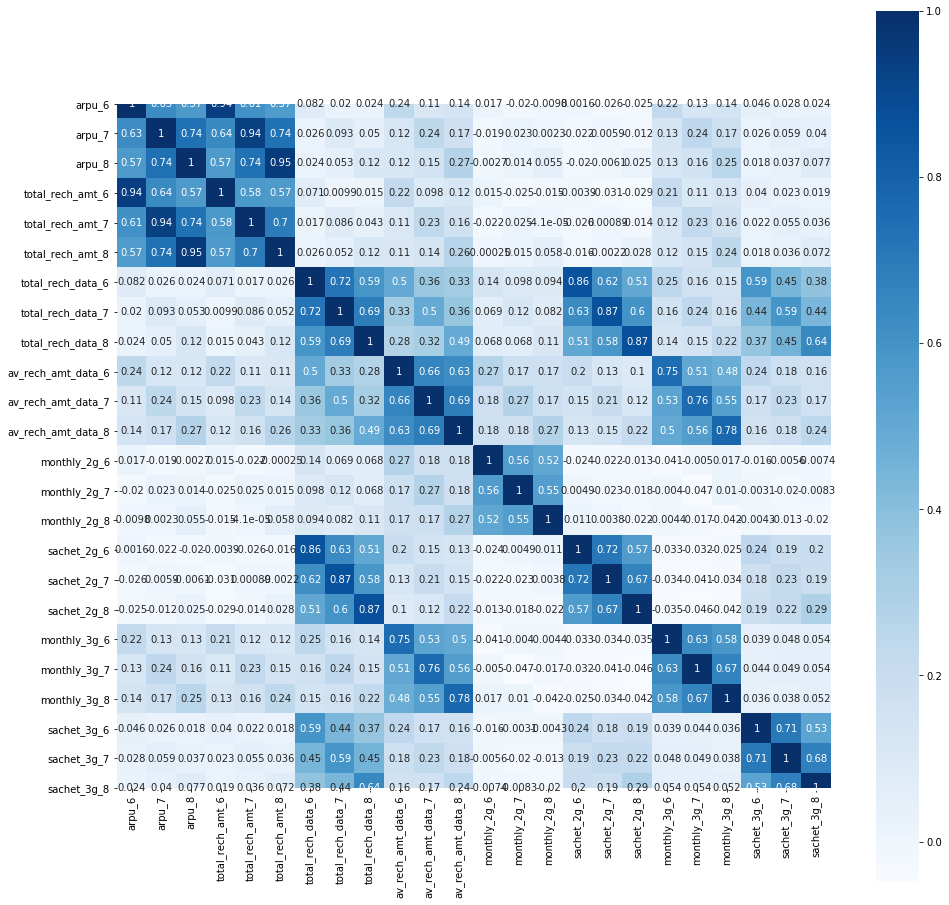

In [ ]:
# Correlation matrix for few numerical columns
amt_corr = df_2[['arpu_6',
 'arpu_7',
 'arpu_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']].corr()

plt.figure(figsize=(16,16))
sb.heatmap(data=amt_corr, cmap='Blues', square=True, annot=True)
plt.show()

##### We can remove ['arpu_6', 'arpu_7', 'arpu_8'] since they are highly correlated

In [ ]:
df_2.drop(columns=['arpu_6', 'arpu_7', 'arpu_8'], inplace=True)

In [ ]:
# Creating few more lists with different numerical columns which will be later used for heatmap analysis
ic_loc_corr = df_2[['loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']].corr()

ic_std_corr = df_2[['std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']].corr()

ic_isd_corr = df_2[['isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']].corr()

ic_tot_corr = df_2[['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']].corr()



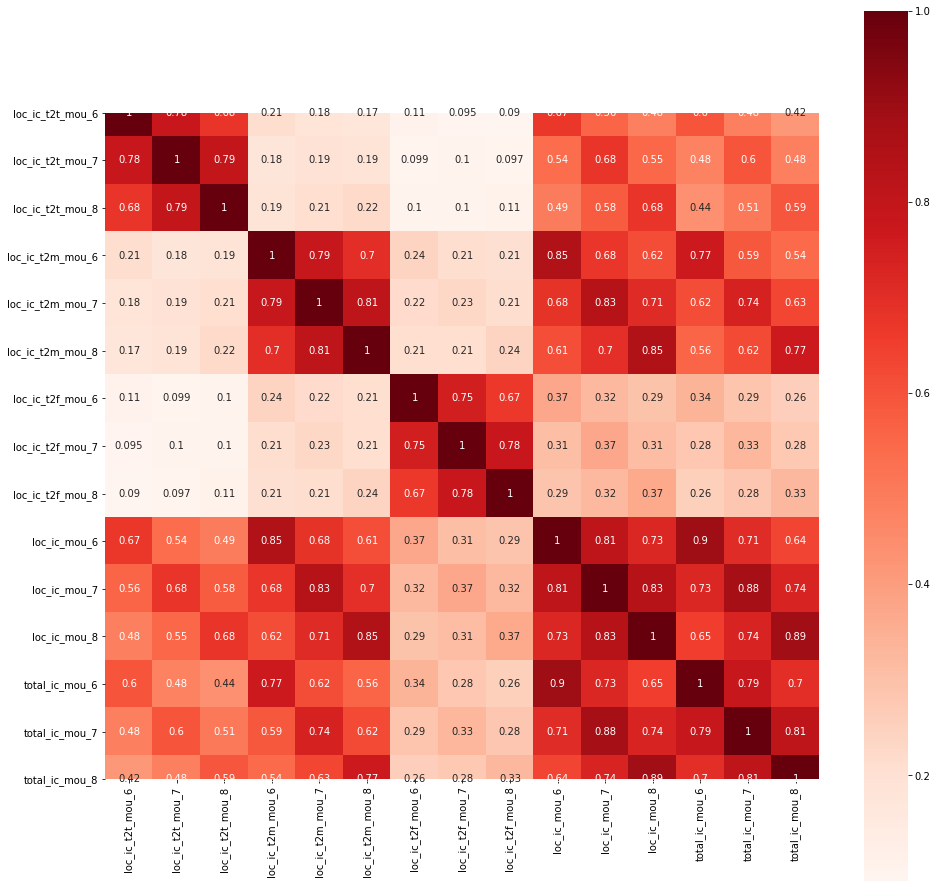

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=ic_loc_corr, cmap='Reds', square=True, annot=True)
plt.show()

#####We can remove ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']

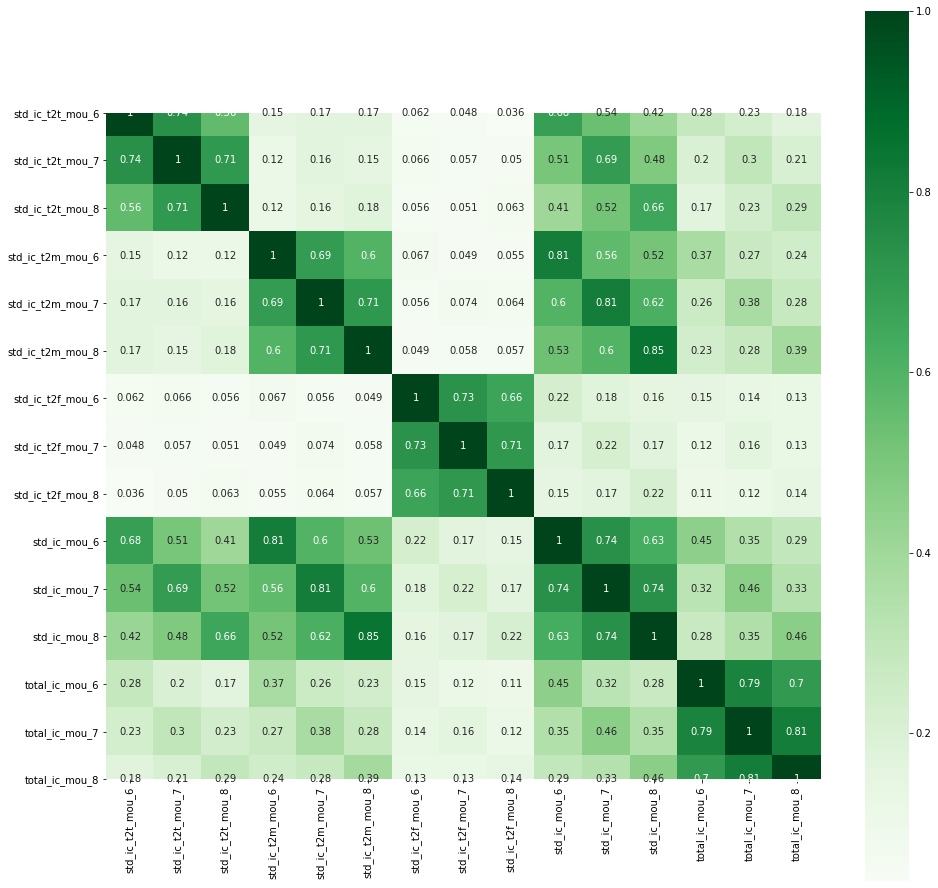

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=ic_std_corr, cmap='Greens', square=True, annot=True)
plt.show()

#####We can remove ['std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']

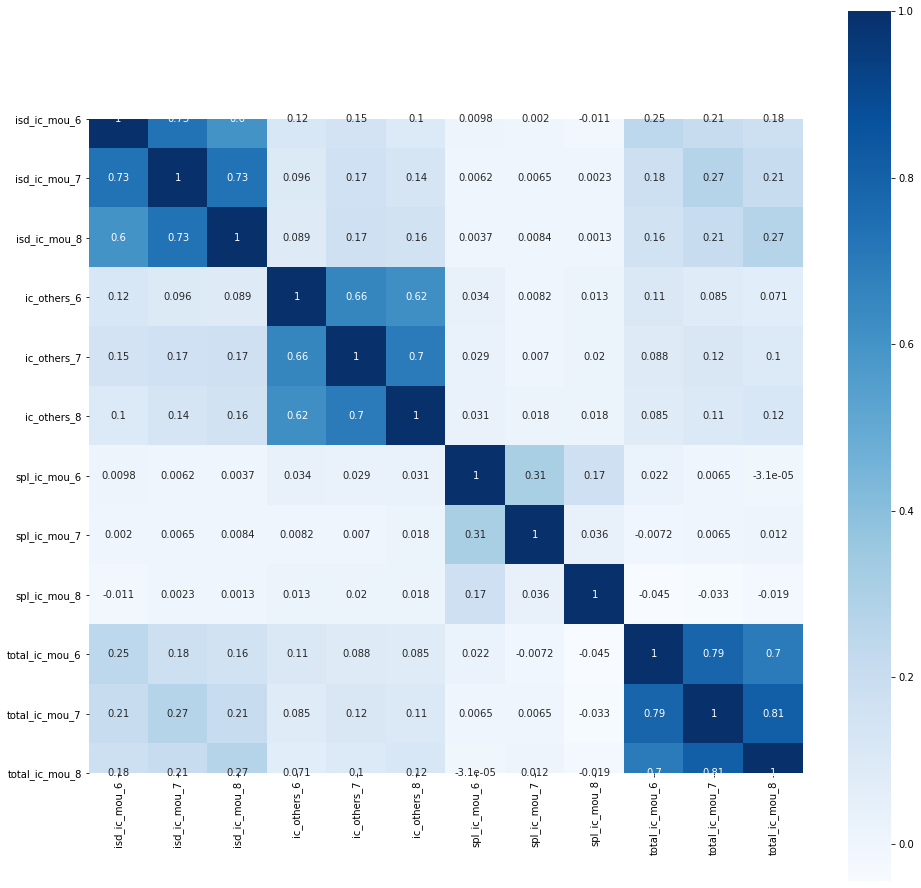

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=ic_isd_corr, cmap='Blues', square=True, annot=True)
plt.show()

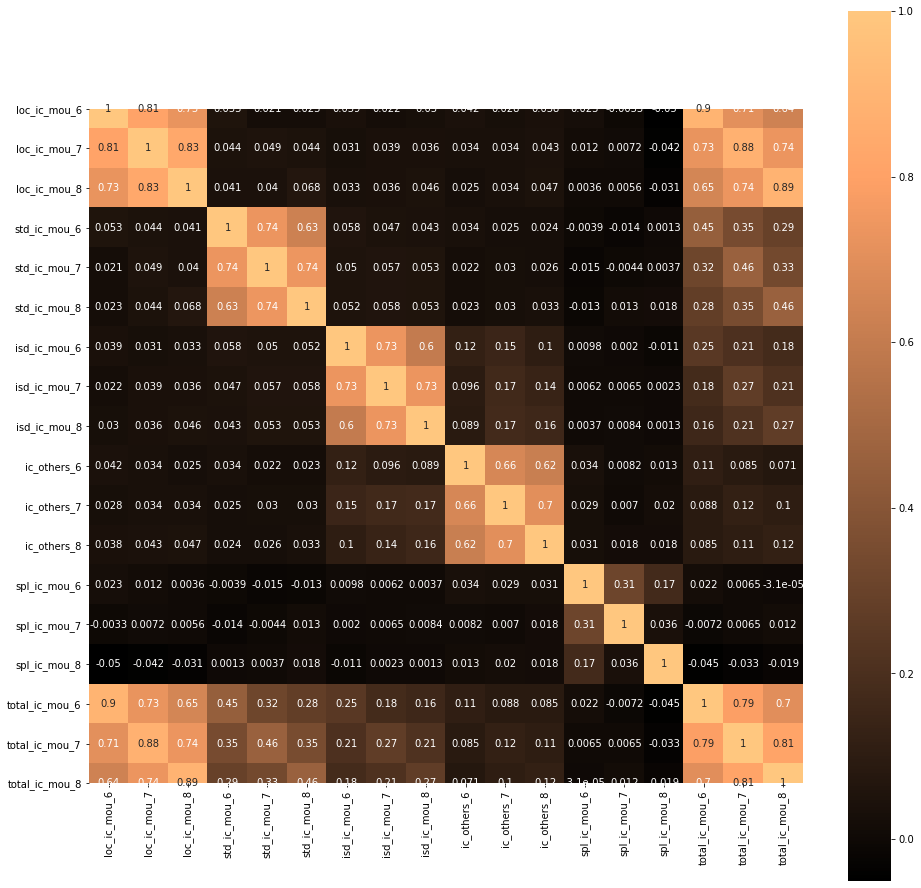

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=ic_tot_corr, cmap='copper', square=True, annot=True)
plt.show()

In [ ]:
og_loc_corr = df_2[['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']].corr()


og_std_corr = df_2[['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']].corr()


og_isd_corr = df_2[['isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']].corr()


og_tot_corr = df_2[['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']].corr()

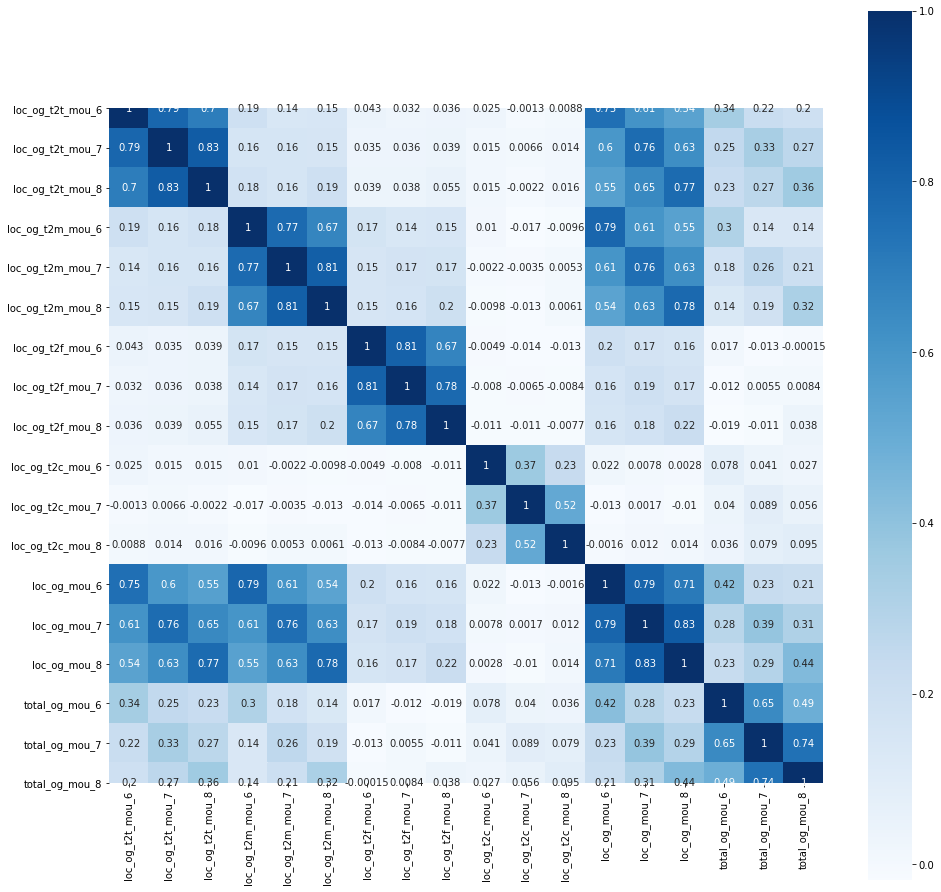

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=og_loc_corr, cmap='Blues', square=True, annot=True)
plt.show()

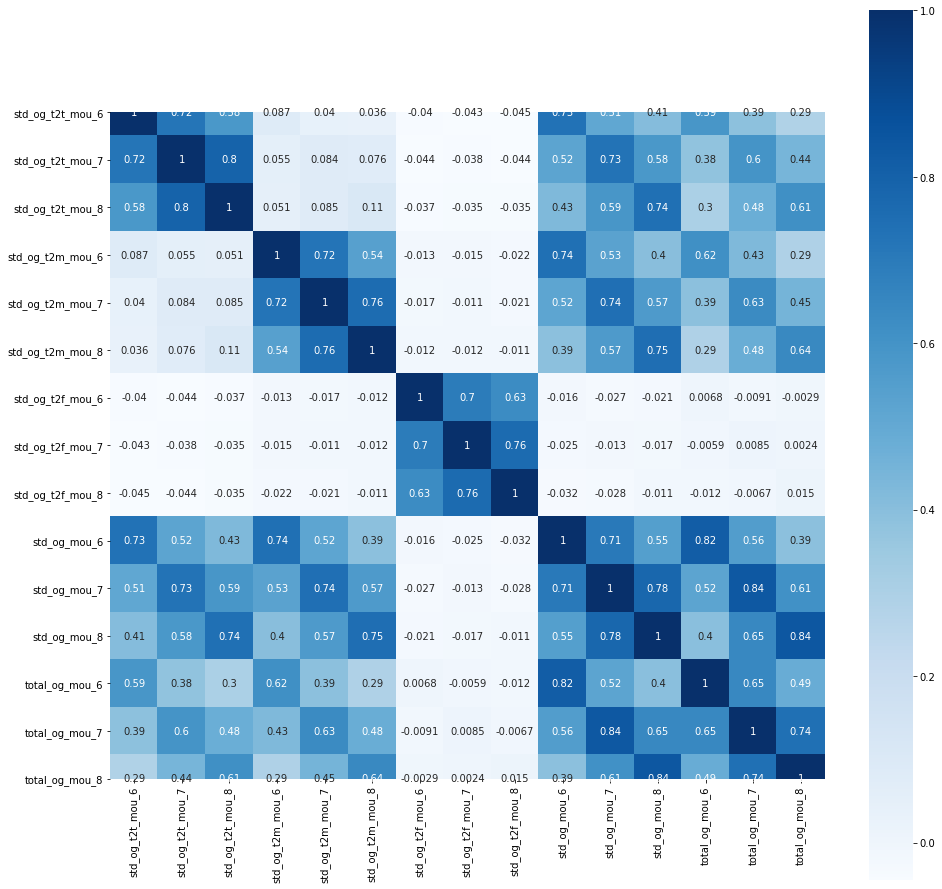

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=og_std_corr, cmap='Blues', square=True, annot=True)
plt.show()

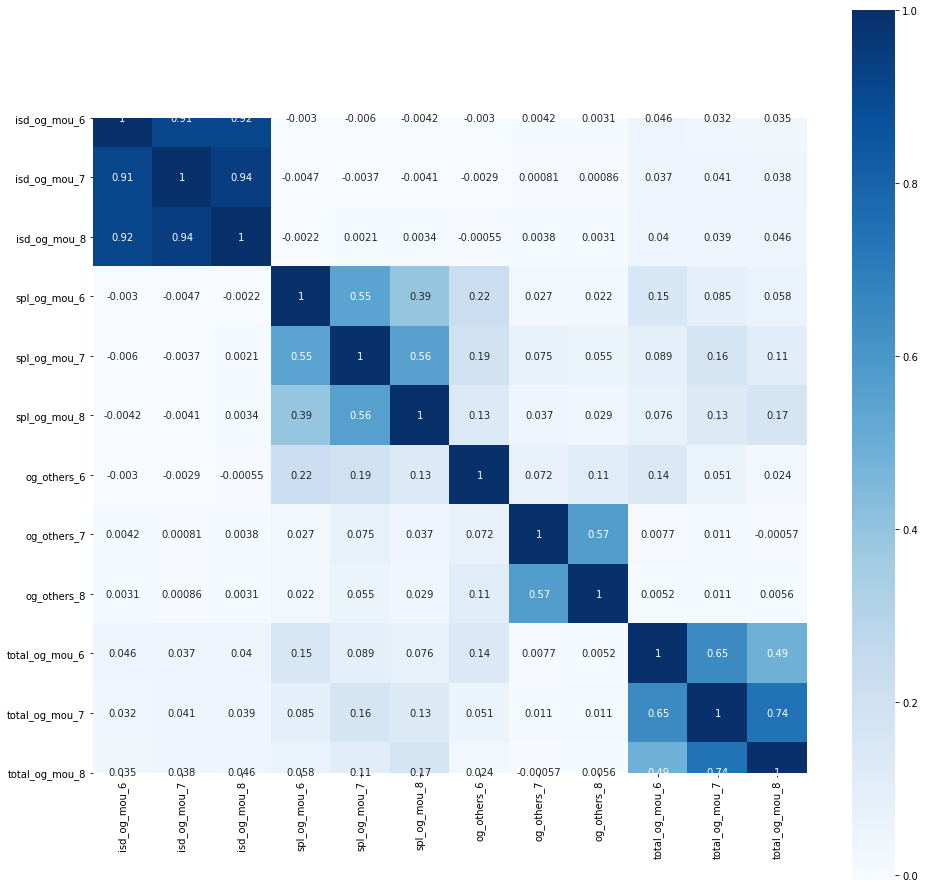

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=og_isd_corr, cmap='Blues', square=True, annot=True)
plt.show()

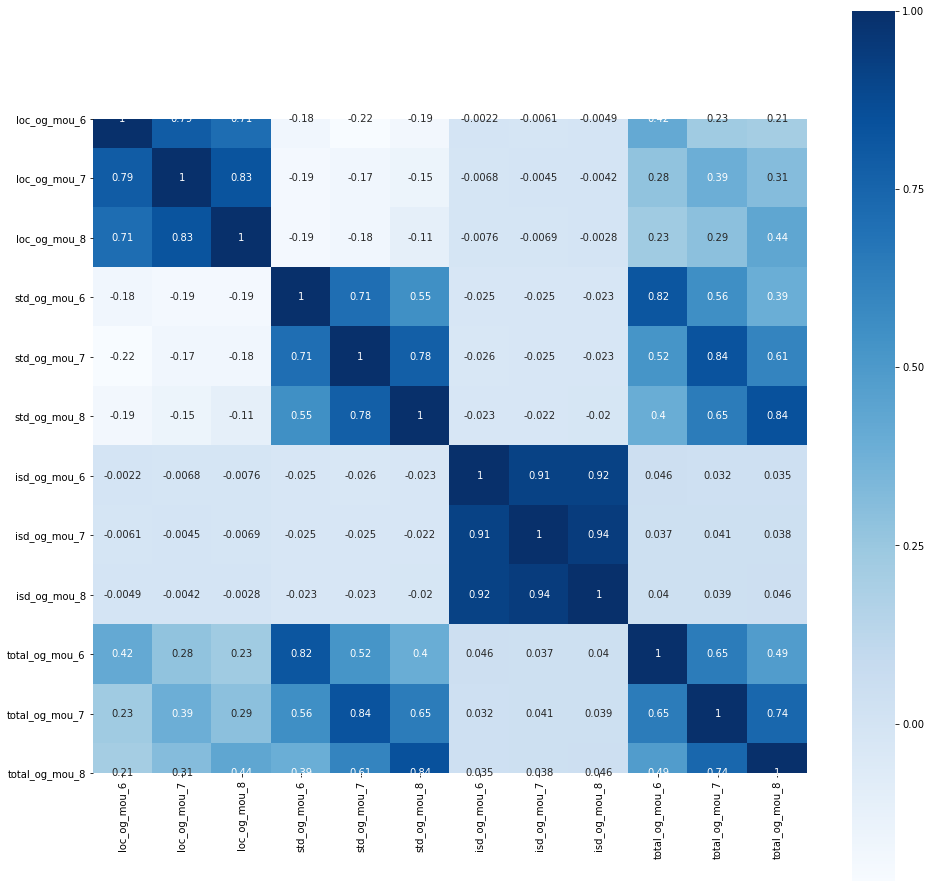

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=og_tot_corr, cmap='Blues', square=True, annot=True)
plt.show()

Based on the above heatmaps analysis , below are the highly correlated column that can be dropped

In [ ]:
df_2.drop(columns=['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'], inplace=True)

In [ ]:
df_2.drop(columns=['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8'], inplace=True)

In [ ]:
df_2.drop(columns=['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], inplace=True)

In [ ]:
df_2.drop(columns=['loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8'], inplace=True)

In [ ]:
#Final List of column remaining.
print(len(df_2.columns))
list(df_2.columns)

80


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb

In [ ]:
#Finding the most corerlated pair-wise columns
ar = df_2.corr()

high_corr_cols = []

for i in ar.columns:
  for j in ar.columns:
    if((i!=j) & (ar[i][j]!=1) & (ar[i][j]!=-1) & ((ar[i][j]>=0.8) or (ar[i][j]<=-0.8))):
      high_corr_cols.append(i)

print(len(list(set(high_corr_cols))))
high_corr_cols = list(set(high_corr_cols))

18


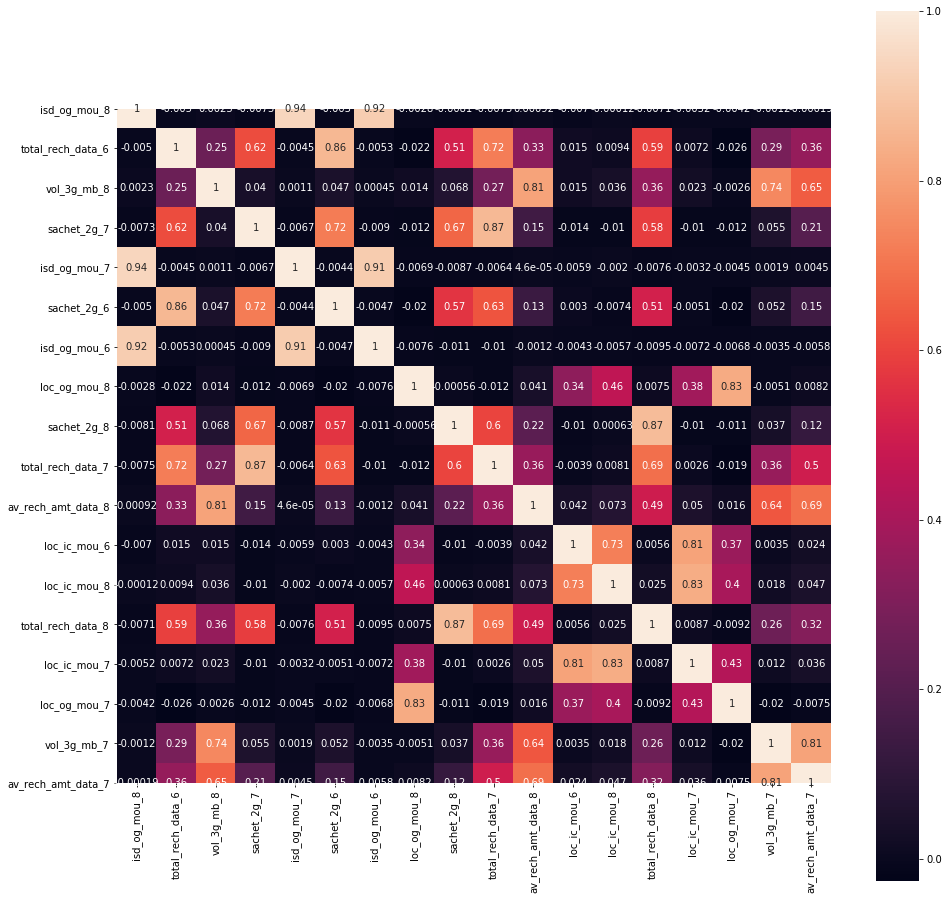

In [ ]:
plt.figure(figsize=(16,16))
sb.heatmap(data=df_2[high_corr_cols].corr(), square=True, annot=True)
plt.show()

### EDA - Univariate Analysis

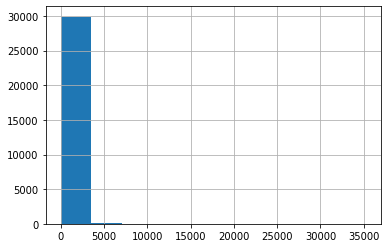

In [ ]:
#Unvariant analysis on continuos variable on target-0 dataframe
df_2.total_rech_amt_6.hist()

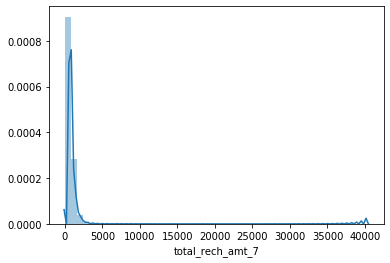

In [ ]:
sb.distplot(df_2.total_rech_amt_7)

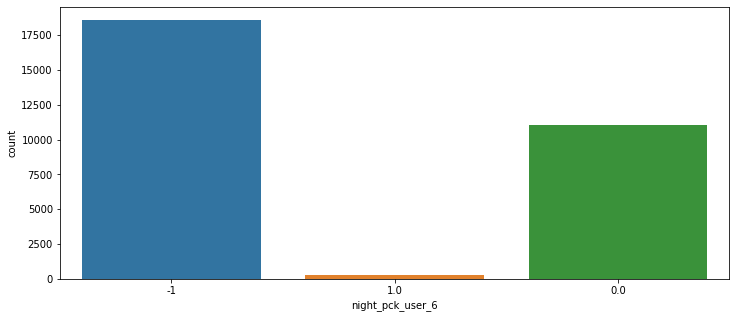

In [ ]:
#Univariat analysis on categorical variable on target-0 dataframe
plt.figure(figsize=(12,5)) 
sb.countplot(df_2.night_pck_user_6)
plt.show()


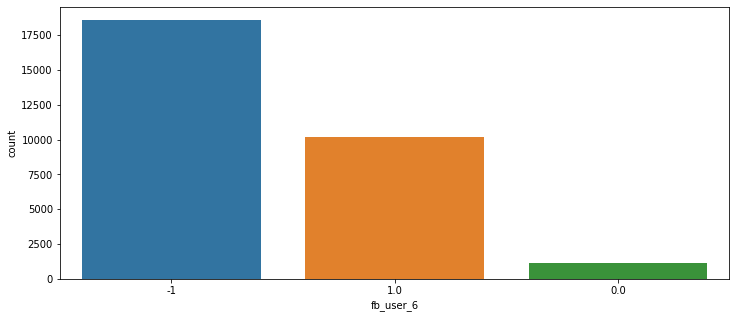

In [ ]:
#Univariat analysis on categorical variable 
plt.figure(figsize=(12,5)) 
sb.countplot(df_2.fb_user_6)
plt.show()


### Bivariate analysis 

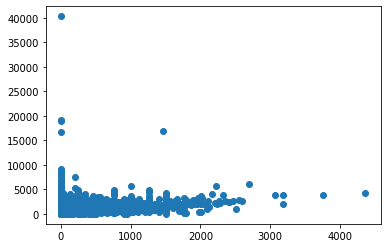

In [ ]:
#Bivariant analysis on contnious - continuos data 
#scatter plot
plt.scatter(df_2['av_rech_amt_data_7'],df_2['total_rech_amt_7'])

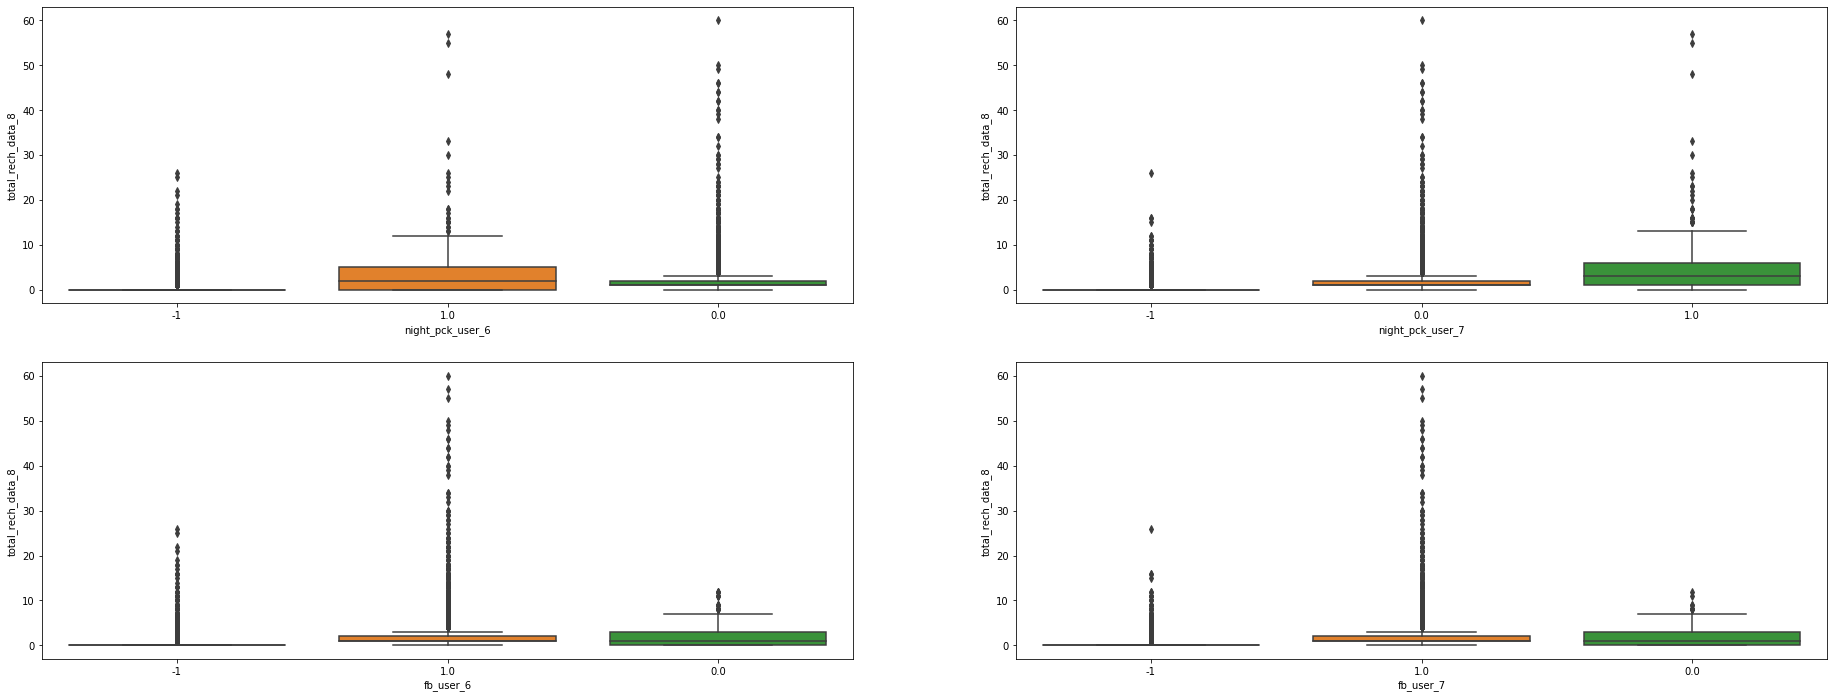

In [ ]:
# plot multiple categoricals variable with a continuos variable using subplot.
cat_var=['night_pck_user_6','night_pck_user_7','fb_user_6','fb_user_7']
plt.figure(figsize=(32,12)) 
for i in enumerate(cat_var):
    plt.subplot(2,2,i[0]+1)
    sb.boxplot(x=i[1],y='total_rech_data_8',data=df_2)

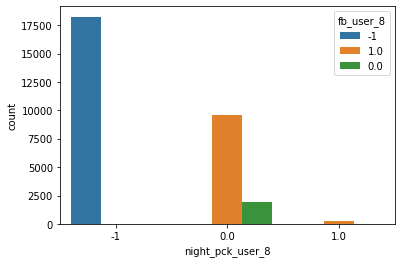

In [ ]:
#Bivariant analysis on categorical - categorical data 
# count plot
sb.countplot(x='night_pck_user_8',hue='fb_user_8', data=df_2)

In [ ]:
#Describing the numerical daat for the remaining columns
df_2.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,283.058317,284.220111,261.305826,395.120001,415.617820,353.81534,2.266842,2.207826,2.029675,5.920726,7.429822,6.889372,0.693200,0.047651,0.059194,244.064853,247.713761,234.331024,51.149589,53.394721,48.180997,0.066736,0.018064,0.027609,11.14435,12.34135,11.688108,1.189804,1.478162,1.237346,697.720204,696.309083,613.908403,0.936889,1.053938,1.035425,90.788857,97.605184,89.803108,78.875263,78.196804,69.248761,258.623297,278.341301,270.061116,0.124954,0.131425,0.114080,0.499817,0.586877,0.607525,0.174055,0.185296,0.173321,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,0.08636
std,460.94123,481.966821,466.750205,470.773248,486.710075,477.656991,79.192826,76.343222,74.588105,118.629898,97.974803,106.294911,380.140057,375.993720,366.663849,606.718739,637.673317,616.45287,45.942529,45.642568,44.817776,18.630406,23.076593,22.903352,2.282437,2.743248,3.322091,312.931377,315.580778,307.121461,140.564801,149.236851,141.009723,0.194321,0.182005,0.116422,67.21659,76.96167,74.924529,13.994391,15.414578,12.894187,539.488337,562.327538,602.047678,2.176824,2.412950,2.405824,191.272837,198.435609,185.886834,277.525473,280.430249,268.616268,866.619871,856.096362,859.715968,0.374656,0.387793,0.357335,1.698845,1.900280,1.844605,0.574545,0.620703,0.583178,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,0.28090
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

### Finding the outliers using IQR method

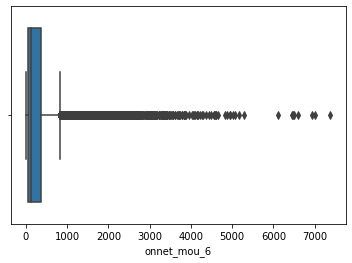

In [ ]:
sb.boxplot(df_2.onnet_mou_6)

In [ ]:
df_2.onnet_mou_6.describe()

count    29979.00000
mean       296.23634
std        460.94123
min          0.00000
25%         41.17000
50%        125.89000
75%        353.50000
max       7376.71000
Name: onnet_mou_6, dtype: float64

In [ ]:
q1=df_2.onnet_mou_6.quantile(0.25)
q3=df_2.onnet_mou_6.quantile(0.75)
IQR=q3-q1
low_range=q1-(1.5*IQR)
high_range=q3+(1.5*IQR)
print('q1 is {}, q2 is {}, IQR is {}, range is ({},{})'.format(q1,q3,IQR,low_range,high_range))

q1 is 41.17, q2 is 353.5, IQR is 312.33, range is (-427.325,821.995)


In [ ]:
df_2[df_2.onnet_mou_6>high_range]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
17,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,97.54,0.00,0.00,1148.46,0.81,0.00,0.0,0.0,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,816,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,667,0.00,0.00,0.00,0
48,2061.69,881.43,156.91,1087.76,258.29,68.18,0.00,0.00,0.00,0.00,0.00,0.00,1642.58,347.08,95.69,1506.81,792.23,129.39,0.0,0.0,0.00,1.58,1.34,0.00,1.45,0.0,0.0,1212.39,460.14,154.26,38.16,56.28,16.88,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2317,580,197,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,1265,0.00,0.00,0.00,0
73,2020.84,3220.46,1074.98,3897.06,1247.11,304.48,0.00,0.00,0.00,0.00,0.00,0.00,334.16,196.06,150.44,5582.53,4271.51,1229.01,0.0,0.0,0.00,1.21,9.39,2.21,11.90,0.0,0.0,226.83,217.26,232.58,35.74,88.96,50.84,0.00,0.0,0.00,0.00,0.00,12.08,0.00,0.00,0.00,2759,2294,716,0.0,1.0,0.0,0.0,98.0,0.0,0.00,154.08,0.00,0.00,0.00,0.00,-1,0,-1,0,0,0,0,1,0,0,0,0,0,0,0,-1,1,-1,2283,0.00,0.00,0.00,0
105,995.39,453.39,590.31,185.74,239.63,310.48,0.00,0.00,0.00,0.00,0.00,0.00,1166.91,668.53,862.49,14.23,17.48,21.06,0.0,0.0,0.00,0.00,7.01,17.23,0.00,0.0,0.0,367.58,323.86,339.51,0.66,7.14,25.29,0.16,0.0,0.00,31.44,1.10,5.68,0.00,0.00,0.18,710,605,617,1.0,1.0,2.0,252.0,145.0,202.0,0.00,20.62,1.41,1095.56,477.29,950.98,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,467,65.85,6.46,0.00,0
133,1095.53,2071.06,1360.69,218.69,331.03,738.46,0.00,0.00,0.00,0.00,0.00,0.00,904.71,1693.94,1409.81,409.51,708.14,689.09,0.0,0.0,0.00,0.00,0.00,0.25,0.00,0.0,0.0,576.24,342.26,473.23,13.38,14.14,29.79,0.00,0.0,0.00,1.83,0.00,17.89,0.00,0.00,1.46,1207,847,1060,2.0,2.0,1.0,285.0,285.0,154.0,8.97,69.32,30.43,687.09,1382.43,175.19,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1218,147.38,664.95,13.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99823,2464.98,2577.33,2410.53,40.04,61.74,72.86,0.00,0.00,0.00,0.00,0.00,0.00,26.99,25.88,40.54,2477.63,2597.46,2440.94,0.0,0.0,0.16,0.40,15.73,1.73,0.78,0.0,0.0,41.59,28.81,15.54,33.94,12.96,13.84,0.00,0.0,0.00,46.73,16.84,67.43,0.13,0.00,0.00,1336,1591,1634,0.0,3.0,2.0,0.0,75.0,42.0,0.00,746.00,593.91,0.00,0.00,0.00,-1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,-1,1,1,229,0.00,0.00,0.00,0
99827,1263.94,0.06,0.00,151.26,0.00,0.00,385.51,0.00,0.00,899.01,0.06,0.00,64.71,0.00,0.00,453.19,0.00,0.00,0.0,0.0,0.00,2.05,0.00,0.00,13.18,0.0,0.0,44.98,0.00,0.00,6.78,0.00,0.00,0.00,0.0,0.00,0.11,0.00,0.00,3.48,0.00,0.00,1346,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,509,0.00,0.00,0.00,1
99850,1215.29,552.2

In [ ]:
# Capping the outliers to 99%  for all the numerical variables as all of them have outliers 

for col in num_cols_Final:
    percentiles = df_2[col].quantile([0.01,0.99]).values
    df_2[col] = np.clip(df_2[col], percentiles[0], percentiles[1])

In [ ]:
#Describing the numerical data for the remaining columns
df_2.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,283.058317,284.220111,261.305826,395.120001,415.617820,353.81534,2.266842,2.207826,2.029675,5.920726,7.429822,6.889372,0.693200,0.047651,0.059194,244.064853,247.713761,234.331024,51.149589,53.394721,48.180997,0.066736,0.018064,0.027609,11.14435,12.34135,11.688108,1.189804,1.478162,1.237346,697.720204,696.309083,613.908403,0.936889,1.053938,1.035425,90.788857,97.605184,89.803108,78.875263,78.196804,69.248761,258.623297,278.341301,270.061116,0.124954,0.131425,0.114080,0.499817,0.586877,0.607525,0.174055,0.185296,0.173321,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,0.08636
std,460.94123,481.966821,466.750205,470.773248,486.710075,477.656991,79.192826,76.343222,74.588105,118.629898,97.974803,106.294911,380.140057,375.993720,366.663849,606.718739,637.673317,616.45287,45.942529,45.642568,44.817776,18.630406,23.076593,22.903352,2.282437,2.743248,3.322091,312.931377,315.580778,307.121461,140.564801,149.236851,141.009723,0.194321,0.182005,0.116422,67.21659,76.96167,74.924529,13.994391,15.414578,12.894187,539.488337,562.327538,602.047678,2.176824,2.412950,2.405824,191.272837,198.435609,185.886834,277.525473,280.430249,268.616268,866.619871,856.096362,859.715968,0.374656,0.387793,0.357335,1.698845,1.900280,1.844605,0.574545,0.620703,0.583178,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,0.28090
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## Modelling

In [ ]:
#Modelling
#divide data into train and test and test-stratify
#Aggregate the categorical variables
#Replace categories with aggregated values in each categorical column

#Check data type of categorical - make sure they are numeric

In [ ]:
df_3 = df_2.copy()

#Create Dummies
#Creating dummies for categorical columns
for i in [j for j in df_3.columns if((df_3[j].dtype)=='object')]:
  dummy = pd.get_dummies(df_3[i], prefix=i, prefix_sep='--->', drop_first=False)
  df_3 = pd.concat([df_3,dummy], axis=1)
  df_3.drop(columns=i, inplace=True)

print("The features after creating dummies "+str(list(df_3.columns)))
print("Total columns after creating dummies "+str(len(df_3.columns)))
df_3.head()

The features after creating dummies ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,night_pck_user_6--->0.0,night_pck_user_6--->1.0,night_pck_user_6--->-1,night_pck_user_7--->0.0,night_pck_user_7--->1.0,night_pck_user_7--->-1,night_pck_user_8--->0.0,night_pck_user_8--->1.0,night_pck_user_8--->-1,fb_user_6--->0.0,fb_user_6--->1.0,fb_user_6--->-1,fb_user_7--->0.0,fb_user_7--->1.0,fb_user_7--->-1,fb_user_8--->0.0,fb_user_8--->1.0,fb_user_8--->-1
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,1580,790,3638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,437,601,120,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
13,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,205.31,53.48,353.99,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,507,253,717,0.0,0.0,3.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
16,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,315.91,215.64,205.93,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,570,348,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
17,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,97.54,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,816,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
y = df_3.pop('churn')
X = df_3

In [ ]:
X.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night_pck_user_6--->0.0,night_pck_user_6--->1.0,night_pck_user_6--->-1,night_pck_user_7--->0.0,night_pck_user_7--->1.0,night_pck_user_7--->-1,night_pck_user_8--->0.0,night_pck_user_8--->1.0,night_pck_user_8--->-1,fb_user_6--->0.0,fb_user_6--->1.0,fb_user_6--->-1,fb_user_7--->0.0,fb_user_7--->1.0,fb_user_7--->-1,fb_user_8--->0.0,fb_user_8--->1.0,fb_user_8--->-1
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,1580,790,3638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
8,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,437,601,120,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
13,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,205.31,53.48,353.99,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,507,253,717,0.0,0.0,3.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
16,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,315.91,215.64,205.93,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,570,348,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
17,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,97.54,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,816,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

#### Scaling the data

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=y.index, columns=list(X.columns))

In [ ]:
X.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night_pck_user_6--->0.0,night_pck_user_6--->1.0,night_pck_user_6--->-1,night_pck_user_7--->0.0,night_pck_user_7--->1.0,night_pck_user_7--->-1,night_pck_user_8--->0.0,night_pck_user_8--->1.0,night_pck_user_8--->-1,fb_user_6--->0.0,fb_user_6--->1.0,fb_user_6--->-1,fb_user_7--->0.0,fb_user_7--->1.0,fb_user_7--->-1,fb_user_8--->0.0,fb_user_8--->1.0,fb_user_8--->-1
7,-0.517203,-0.518534,-0.461752,0.074989,0.293931,-0.103109,-0.015129,0.261386,0.246383,-0.047277,-0.096623,0.155950,0.365928,0.664091,-0.015044,-0.550940,-0.533947,-0.447690,-0.049342,-0.044429,0.178065,-0.076260,-0.321969,-0.017001,-0.303715,-0.01737,-0.017819,0.587407,0.340699,-0.150728,0.920519,0.801995,1.033698,0.737264,-0.099251,-0.237147,-0.135153,0.028439,0.265630,1.039734,0.889552,1.078229,1.635428,0.166615,5.023094,-0.4304,-0.436791,-0.430390,-0.474664,-0.491882,-0.483114,-0.284214,-0.278850,-0.257802,-0.298433,-0.325134,-0.314134,-0.333523,-0.338912,-0.319257,-0.294215,-0.308843,-0.329358,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.473929,-0.183664,-0.283787,-0.263426,-0.765466,-0.102385,0.782603,-0.780886,-0.09986,0.797360,-0.786765,-0.096922,0.802350,-0.201166,-0.719242,0.782603,-0.211534,-0.727106,0.797360,-0.260857,-0.698526,0.802350
8,0.254817,0.096353,-0.498624,-0.687110,-0.705716,-0.499697,-0.220075,-0.177298,-0.177821,-0.247398,-0.225127,-0.202116,0.249995,0.010532,-0.540738,-0.436552,-0.426774,-0.414532,-0.049342,-0.048373,-0.045288,-0.317804,-0.321969,0.145860,-0.303715,-0.01737,-0.017819,-0.519723,-0.709446,-0.711590,-0.204319,-0.326565,-0.336372,-0.343439,-0.099251,-0.237147,-0.165800,-0.160360,-0.156001,-0.085021,-0.095895,-0.095963,-0.483281,-0.169493,-0.820395,-0.4304,0.392084,0.816605,-0.474664,0.400110,-0.111915,-0.284214,0.990649,-0.257691,-0.298433,0.552060,-0.300245,-0.333523,2.239829,-0.319257,-0.294215,0.217404,1.297034,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.973332,-0.277643,1.899565,0.001819,-0.765466,-0.102385,0.782603,1.280596,-0.09986,-1.254138,1.271028,-0.096922,-1.246339,-0.201166,-0.719242,0.782603,-0.211534,1.375316,-1.254138,-0.260857,1.431585,-1.246339
13,0.445886,-0.407093,0.570831,-0.010234,-0.626304,0.224642,0.077053,1.712096,0.788972,-0.180129,0.134767,-0.188569,-0.204529,-0.613691,0.252781,0.505449,-0.433909,0.488877,-0.049342,-0.048373,-0.016504,-0.317804,-0.321969,-0.092100,-0.303715,-0.01737,-0.017819,-0.091027,-0.702221,0.068147,2.651209,0.098471,3.022743,1.972354,-0.099251,-0.237147,3.483360,0.646679,5.094570,5.880325,0.957670,1.566829,-0.353526,-0.788360,0.171238,-0.4304,-0.436791,0.816605,-0.474664,-0.491882,-0.111915,-0.284214,-0.278850,-0.257728,-0.298433,-0.325134,-0.314134,-0.333523,-0.338912,-0.319257,-0.294215,-0.308843,1.297034,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,1.377040,-0.331481,-0.331263,-0.311489,-0.765466,-0.102385,0.782603,-0.780886,-0.09986,0.797360,1.271028,-0.096922,-1.246339,-0.201166,-0.719242,0.782603,-0.211534,-0.727106,0.797360,-0.260857,1.431585,-1.246339
16,-0.533106,-0.478427,-0.4225

##### Test Train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.915273
1    0.084727
Name: churn, dtype: float64
0    0.907105
1    0.092895
Name: churn, dtype: float64


In [ ]:
#Based on the above value_counts , the target variable is imbalanced. Below is one of the techniques to handle this imbalanced data

### SMOTE to handle imbalance (OverSampling)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, ratio=1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

y_train_bal = pd.Series(y_train_sm, name='churn')
print(y_train_bal.head())
X_train_bal = pd.DataFrame(X_train_sm, columns=list(X_train.columns))
print(X_train_bal.head())

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64
   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0    -0.563761    -0.612007    -0.550195      0.089646      0.468267   
1    -0.543910    -0.485543    -0.444997      0.316935     -0.208225   
2    -0.515142    -0.431680    -0.366753     -0.665486     -0.400581   
3     0.646088     0.083551     1.080512     -0.782551     -0.753055   
4    -0.197266     0.090128     0.192335     -0.151132      0.140695   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0      0.002052      -0.220075      -0.177298      -0.177821      -0.247398   
1      0.287764       0.460932      -0.177298      -0.015459       1.189531   
2     -0.282488      -0.220075      -0.177298      -0.177821      -0.247398   
3     -0.330954      -0.220075      -0.177298      -0.177821      -0.247398   
4      0.713285      -0.220075      -0.177298      -0.177821      -0.247398   

   roam_og_mou_7  roam_og_mou_8

In [ ]:
# After the oversampling technique applies, now lets chech the value counts for the balanced data
print(y_train_bal.value_counts())
print(y_train_bal.value_counts(normalize=True))

1    21951
0    21951
Name: churn, dtype: int64
1    0.5
0    0.5
Name: churn, dtype: float64


### RFE Logistic Regression

In [ ]:
# Calculation of VIF
#Pass the X_Train at that point of time to calculate it
def calc_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [ ]:
from sklearn.feature_selection import RFECV

#Performing RFE
lr = LogisticRegression()
lr.fit(X_train_bal, y_train_bal)
lr_rfe = RFE(lr,50)

#If using RFECV
#lr_rfe = RFECV(estimator=lr)
lr_rfe = lr_rfe.fit(X_train_bal, y_train_bal)

#Selected columns/features/variables
imp_feat = X_train_bal.columns[lr_rfe.support_]
print(imp_feat)

#Ranks of all the columns/features/variables
list(zip(X_train_bal.columns, lr_rfe.support_,lr_rfe.ranking_))

Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_mou_6',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_7',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'night_pck_user_8--->1.0',
       'fb_user_6--->1.0', 'fb_user_7--->1.0', 'fb_user_8--->1.0'],
      dtype='object')


[('onnet_mou_6', False, 2),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 17),
 ('roam_og_mou_7', False, 10),
 ('roam_og_mou_8', True, 1),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 9),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 8),
 ('std_og_mou_8', False, 4),
 ('isd_og_mou_6', True, 1),
 ('isd_og_mou_7', True, 1),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_6', False, 12),
 ('spl_og_mou_7', False, 11),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 5),
 ('og_others_7', True, 1),
 ('og_others_8', True, 1),
 ('loc_ic_mou_6', True, 1),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', True, 1),
 ('std_ic_mou_7', False, 36),
 ('std_ic_mou_8', True, 1),
 ('spl_ic_mou_6', False, 29),
 ('spl_ic_mou_7', True, 1),
 ('

In [ ]:
#DataFrame with only the selected features
X_train_mod1 = X_train_bal[imp_feat]
X_train_mod1.head()

,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_8,loc_og_mou_6,loc_og_mou_8,std_og_mou_6,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_8,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_8,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_7,isd_ic_mou_8,ic_others_7,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_8,av_rech_amt_data_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_7,sachet_3g_8,aon,night_pck_user_8--->1.0,fb_user_6--->1.0,fb_user_7--->1.0,fb_user_8--->1.0
0,-0.612007,-0.550195,0.089646,0.468267,0.002052,-0.220075,-0.177298,-0.177821,-0.202116,-0.715612,-0.702742,0.139952,-0.049342,-0.048373,-0.045288,-0.149735,-0.01737,-0.017819,-0.667745,-0.753778,-0.694919,0.464850,2.535321,-0.099251,-0.237147,-0.160360,-0.156001,-0.095895,-0.559280,-0.107251,-0.494834,-0.430390,-0.474664,-0.27885,-0.257802,-0.298433,-0.325134,-0.314134,-0.333523,-0.338912,-0.319257,-0.329358,-0.297206,-0.155026,-0.144072,-0.933339,-0.096922,-0.719242,-0.727106,-0.698526
1,-0.485543,-0.444997,0.316935,-0.208225,0.287764,0.460932,-0.177298,-0.015459,0.049547,0.295953,0.598471,-0.574065,-0.049342,-0.048373,-0.045288,-0.259328,-0.01737,-0.017819,-0.382214,-0.300479,-0.285237,-0.280798,-0.023339,-0.099251,-0.237147,-0.155682,-0.156001,-0.095895,0.334174,-0.077019,0.255950,-0.014725,0.560524,-0.27885,-0.226754,0.547846,1.345302,0.815654,2.335638,2.239829,2.479282,-0.329358,-0.297206,-0.155026,-0.144072,-0.902575,-0.096922,1.390352,1.375316,1.431585
2,-0.431680,-0.366753,-0.665486,-0.400581,-0.282488,-0.220075,-0.177298,-0.177821,-0.202116,-0.327854,0.055513,-0.642664,-0.049342,-0.048373,-0.045288,-0.049748,-0.01737,-0.017819,-0.046129,-0.216664,0.013542,-0.254973,-0.272688,-0.099251,-0.237147,-0.090714,0.003896,-0.075784,0.923631,1.205173,0.930327,0.400940,3.477871,-0.27885,-0.254266,3.155204,1.945723,2.149791,-0.333523,-0.338912,-0.319257,-0.329358,3.132334,-0.155026,-0.144072,-0.847199,-0.096922,1.390352,1.375316,1.431585
3,0.083551,1.080512,-0.782551,-0.753055,-0.330954,-0.220075,-0.177298,-0.177821,-0.202116,-0.525021,-0.353806,0.271399,-0.049342,-0.048373,-0.045288,0.009197,-0.01737,-0.017819,0.062619,-0.666984,-0.582193,-0.118734,-0.124752,-0.099251,-0.237147,-0.160360,-0.156001,-0.020641,0.096908,-0.580293,0.202797,-0.430390,-0.474664,-0.27885,-0.257802,-0.298433,-0.325134,-0.314134,-0.333523,-0.338912,-0.319257,-0.329358,-0.297206,-0.155026,-0.144072,0.081874,-0.096922,-0.719242,-0.727106,-0.698526
4,0.090128,0.192335,-0.151132,0.140695,0.713285,-0.220075,-0.177298,-0.177821,-0.202116,-0.503029,-0.230722,0.107663,-0.049342,-0.048373,-0.045288,1.332606,-0.01737,-0.017819,-0.375663,-0.377830,-0.352378,-0.217836,1.026393,-0.099251,-0.237147,-0.160360,-0.156001,-0.095895,0.061689,0.020791,0.652935,0.400940,0.330482,1.86482,0.293849,-0.298433,-0.325134,0.830345,2.335638,2.239829,2.479282,0.212773,-0.297206,-0.155026,-0.144072,-0.717990,-0.096922,1.390352,1.375316,1.431585


In [ ]:
model_1_cols = list(X_train_mod1.columns)
model_1 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod1), family=stm.families.Binomial()).fit()
print(model_1.summary())
calc_vif(X_train_mod1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43852
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17409.
Date:                Mon, 31 Aug 2020   Deviance:                       34818.
Time:                        09:05:32   Pearson chi2:                 1.41e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
44,sachet_3g_8,inf
42,monthly_3g_8,inf
41,sachet_2g_8,inf
40,monthly_2g_8,inf
31,total_rech_data_8,inf
13,isd_og_mou_7,10.13
14,isd_og_mou_8,7.96
30,total_rech_amt_8,5.59
12,isd_og_mou_6,4.83
32,av_rech_amt_data_6,4.57


In [ ]:
#Dropping the variable with High VIF
X_train_mod2 = X_train_mod1.drop(columns=['sachet_3g_8'], inplace=False)

In [ ]:
model_2_cols = list(X_train_mod2.columns)
model_2 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod2), family=stm.families.Binomial()).fit()
print(model_2.summary())
calc_vif(X_train_mod2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43852
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17409.
Date:                Mon, 31 Aug 2020   Deviance:                       34818.
Time:                        09:06:57   Pearson chi2:                 1.41e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
31,total_rech_data_8,14.10
41,sachet_2g_8,10.57
13,isd_og_mou_7,10.13
14,isd_og_mou_8,7.96
30,total_rech_amt_8,5.59
12,isd_og_mou_6,4.83
32,av_rech_amt_data_6,4.57
11,std_og_mou_6,4.53
19,loc_ic_mou_7,4.14
2,offnet_mou_6,4.13


In [ ]:
#Dropping the variable with High VIF Value
X_train_mod3 = X_train_mod2.drop(columns=['total_rech_data_8'], inplace=False)

In [ ]:
model_3_cols = list(X_train_mod3.columns)
model_3 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod3), family=stm.families.Binomial()).fit()
print(model_3.summary())
calc_vif(X_train_mod3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43853
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17421.
Date:                Mon, 31 Aug 2020   Deviance:                       34842.
Time:                        09:07:16   Pearson chi2:                 1.38e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
13,isd_og_mou_7,10.13
14,isd_og_mou_8,7.95
30,total_rech_amt_8,5.56
12,isd_og_mou_6,4.83
31,av_rech_amt_data_6,4.56
11,std_og_mou_6,4.53
19,loc_ic_mou_7,4.14
2,offnet_mou_6,4.13
20,loc_ic_mou_8,3.96
34,vol_3g_mb_6,3.96


In [ ]:
#Dropping the variable with High VIF Value
X_train_mod4 = X_train_mod3.drop(columns=['isd_og_mou_7'], inplace=False)

In [ ]:
model_4_cols = list(X_train_mod4.columns)
model_4 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod4), family=stm.families.Binomial()).fit()
print(model_4.summary())
calc_vif(X_train_mod4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43854
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17422.
Date:                Mon, 31 Aug 2020   Deviance:                       34845.
Time:                        09:07:28   Pearson chi2:                 1.39e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
29,total_rech_amt_8,5.55
30,av_rech_amt_data_6,4.56
11,std_og_mou_6,4.51
18,loc_ic_mou_7,4.14
2,offnet_mou_6,4.13
33,vol_3g_mb_6,3.96
19,loc_ic_mou_8,3.96
12,isd_og_mou_6,3.86
35,vol_3g_mb_8,3.78
3,offnet_mou_7,3.68


In [ ]:
#Dropping the variable with High p-Value
X_train_mod5 = X_train_mod4.drop(columns=['isd_og_mou_8'], inplace=False)

In [ ]:
model_5_cols = list(X_train_mod5.columns)
model_5 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod5), family=stm.families.Binomial()).fit()
print(model_5.summary())
calc_vif(X_train_mod5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43855
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17422.
Date:                Mon, 31 Aug 2020   Deviance:                       34845.
Time:                        09:07:50   Pearson chi2:                 1.39e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
28,total_rech_amt_8,4.65
29,av_rech_amt_data_6,4.54
11,std_og_mou_6,4.39
17,loc_ic_mou_7,4.14
2,offnet_mou_6,4.12
32,vol_3g_mb_6,3.96
18,loc_ic_mou_8,3.95
34,vol_3g_mb_8,3.77
3,offnet_mou_7,3.67
0,onnet_mou_7,3.61


In [ ]:
#Dropping the variable with High p-Value
X_train_mod6 = X_train_mod5.drop(columns=['og_others_7'], inplace=False)

In [ ]:
model_6_cols = list(X_train_mod6.columns)
model_6 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod6), family=stm.families.Binomial()).fit()
print(model_6.summary())
calc_vif(X_train_mod6)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43856
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17426.
Date:                Mon, 31 Aug 2020   Deviance:                       34853.
Time:                        09:08:06   Pearson chi2:                 1.39e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
27,total_rech_amt_8,4.65
28,av_rech_amt_data_6,4.54
11,std_og_mou_6,4.39
16,loc_ic_mou_7,4.14
2,offnet_mou_6,4.12
31,vol_3g_mb_6,3.96
17,loc_ic_mou_8,3.95
33,vol_3g_mb_8,3.77
3,offnet_mou_7,3.67
0,onnet_mou_7,3.61


In [ ]:
#Dropping the variable with High p-Value
X_train_mod7 = X_train_mod6.drop(columns=['loc_og_mou_6'], inplace=False)

In [ ]:
model_7_cols = list(X_train_mod7.columns)
model_7 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod7), family=stm.families.Binomial()).fit()
print(model_7.summary())
calc_vif(X_train_mod7)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43857
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17428.
Date:                Mon, 31 Aug 2020   Deviance:                       34856.
Time:                        09:08:23   Pearson chi2:                 1.34e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
26,total_rech_amt_8,4.62
27,av_rech_amt_data_6,4.53
15,loc_ic_mou_7,4.13
30,vol_3g_mb_6,3.96
16,loc_ic_mou_8,3.88
32,vol_3g_mb_8,3.77
3,offnet_mou_7,3.66
10,std_og_mou_6,3.63
2,offnet_mou_6,3.59
25,total_rech_amt_7,3.46


In [ ]:
#Dropping the variable with High VIF Value
X_train_mod8 = X_train_mod7.drop(columns=['total_rech_amt_8'], inplace=False)

In [ ]:
model_8_cols = list(X_train_mod8.columns)
model_8 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod8), family=stm.families.Binomial()).fit()
print(model_8.summary())
calc_vif(X_train_mod8)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43858
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17597.
Date:                Mon, 31 Aug 2020   Deviance:                       35194.
Time:                        09:08:36   Pearson chi2:                 1.37e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
26,av_rech_amt_data_6,4.52
15,loc_ic_mou_7,4.12
29,vol_3g_mb_6,3.96
16,loc_ic_mou_8,3.81
31,vol_3g_mb_8,3.71
10,std_og_mou_6,3.62
2,offnet_mou_6,3.57
3,offnet_mou_7,3.42
42,fb_user_8--->1.0,3.25
30,vol_3g_mb_7,3.19


In [ ]:
#Dropping the variable with High p-Value
X_train_mod9 = X_train_mod8.drop(columns=['isd_og_mou_6'], inplace=False)

In [ ]:
model_9_cols = list(X_train_mod9.columns)
model_9 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod9), family=stm.families.Binomial()).fit()
print(model_9.summary())
calc_vif(X_train_mod9)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43859
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17597.
Date:                Mon, 31 Aug 2020   Deviance:                       35195.
Time:                        09:08:49   Pearson chi2:                 1.37e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
25,av_rech_amt_data_6,4.48
14,loc_ic_mou_7,4.12
28,vol_3g_mb_6,3.96
15,loc_ic_mou_8,3.81
30,vol_3g_mb_8,3.71
2,offnet_mou_6,3.57
10,std_og_mou_6,3.43
3,offnet_mou_7,3.41
41,fb_user_8--->1.0,3.24
29,vol_3g_mb_7,3.19


In [ ]:
#Dropping the variable with High p-Value
X_train_mod10 = X_train_mod9.drop(columns=['offnet_mou_6'], inplace=False)

In [ ]:
model_10_cols = list(X_train_mod10.columns)
model_10 = stm.GLM(y_train_bal, stm.add_constant(X_train_mod10), family=stm.families.Binomial()).fit()
print(model_10.summary())
calc_vif(X_train_mod10)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43860
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17598.
Date:                Mon, 31 Aug 2020   Deviance:                       35196.
Time:                        09:09:01   Pearson chi2:                 1.38e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
24,av_rech_amt_data_6,4.47
13,loc_ic_mou_7,4.11
27,vol_3g_mb_6,3.95
14,loc_ic_mou_8,3.80
29,vol_3g_mb_8,3.71
40,fb_user_8--->1.0,3.24
28,vol_3g_mb_7,3.19
39,fb_user_7--->1.0,3.09
38,fb_user_6--->1.0,2.97
5,roam_ic_mou_7,2.85


In [ ]:
#Creating y train predicted
y_train_pred_10 = model_10.predict(stm.add_constant(X_train_mod10[model_10_cols]))
y_train_pred_prob_10 = y_train_pred_10.values.reshape(-1)

y_train_act_vs_pred_mod_10 = pd.DataFrame({'Actual_y':y_train_bal, 'Probability_Predicted_y':y_train_pred_prob_10})
y_train_act_vs_pred_mod_10.head()

,Actual_y,Probability_Predicted_y
0,0,0.390944
1,0,0.081516
2,0,0.077995
3,0,0.250706
4,0,0.020493


In [ ]:
#Predicting y train
y_train_act_vs_pred_mod_10['Predicted_y'] = y_train_act_vs_pred_mod_10['Probability_Predicted_y'].map(lambda x : 1 if x>0.5 else 0)
print(y_train_act_vs_pred_mod_10.head())

#Calculate recall_score (which is also called Sensitivity)
print("\n\nThe sensitivity score is "+str(metrics.recall_score(y_train_act_vs_pred_mod_10['Actual_y'], y_train_act_vs_pred_mod_10['Predicted_y'])))
print("\nThe accuracy score is "+str(accuracy_score(y_train_act_vs_pred_mod_10['Actual_y'], y_train_act_vs_pred_mod_10['Predicted_y'])))

   Actual_y  Probability_Predicted_y  Predicted_y
0         0                 0.390944            0
1         0                 0.081516            0
2         0                 0.077995            0
3         0                 0.250706            0
4         0                 0.020493            0


The sensitivity score is 0.8582296934080452

The accuracy score is 0.836248918044736


In [ ]:
# Caculating the best cut-off value 
cut_off_df = pd.DataFrame(columns=['Probability','Accuracy','Specificity', 'Sensitivity'])

num=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in num:
    y_train_act_vs_pred_mod_10[i] = y_train_act_vs_pred_mod_10['Probability_Predicted_y'].map(lambda x : 1 if x>i else 0)

for i in num:
    conf_mat = metrics.confusion_matrix(y_train_act_vs_pred_mod_10['Actual_y'], y_train_act_vs_pred_mod_10[i])
    TP = conf_mat[1,1]
    TN = conf_mat[0,0]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    total = sum(sum(conf_mat))
    accuracy=(TP+TN)/total
    speci = TN/(TN+FP)
    sensi = TP/(FN+TP)
    cut_off_df.loc[i] = [i, accuracy, speci, sensi]
cut_off_df

,Probability,Accuracy,Specificity,Sensitivity
0.0,0.0,0.500000,0.000000,1.000000
0.1,0.1,0.693545,0.414059,0.973031
0.2,0.2,0.755296,0.558289,0.952303
0.3,0.3,0.795681,0.663068,0.928295
0.4,0.4,0.821762,0.744932,0.898592
0.5,0.5,0.836249,0.814268,0.858230
0.6,0.6,0.840850,0.871714,0.809986
0.7,0.7,0.827274,0.916587,0.737962
0.8,0.8,0.775067,0.950390,0.599745
0.9,0.9,0.611157,0.982324,0.239989


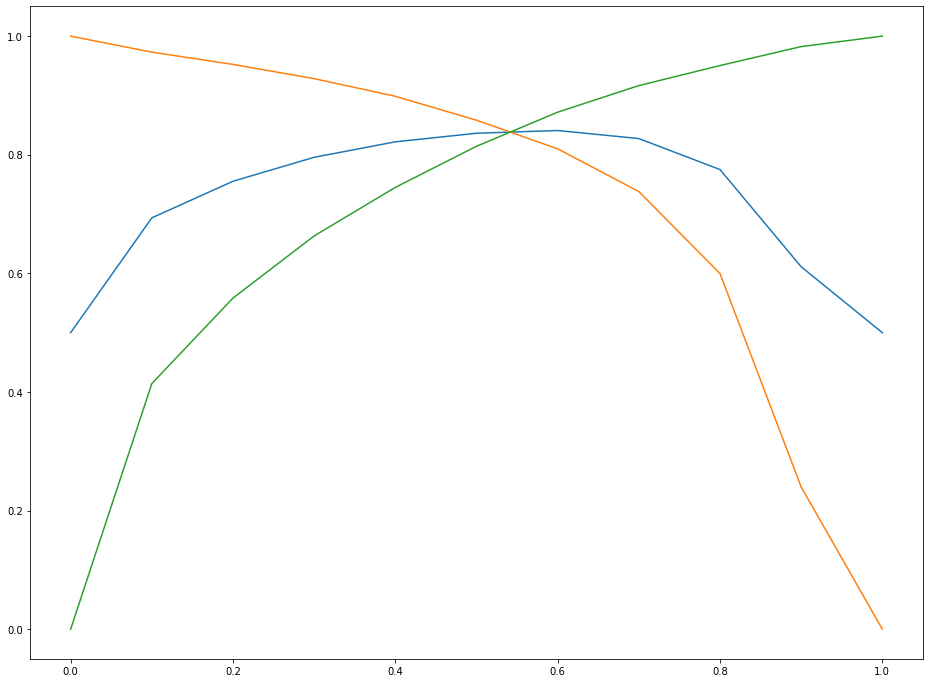

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(cut_off_df['Probability'], cut_off_df['Accuracy'])
plt.plot(cut_off_df['Probability'], cut_off_df['Sensitivity'])
plt.plot(cut_off_df['Probability'], cut_off_df['Specificity'])
plt.show()

In [ ]:
#Predicting y train
y_train_act_vs_pred_mod_10['Predicted_y'] = y_train_act_vs_pred_mod_10['Probability_Predicted_y'].map(lambda x : 1 if x>0.5367 else 0)
print(y_train_act_vs_pred_mod_10.head())

#Calculate recall_score (which is also called Sensitivity)
print("\n\nThe sensitivity score is "+str(metrics.recall_score(y_train_act_vs_pred_mod_10['Actual_y'], y_train_act_vs_pred_mod_10['Predicted_y'])))
print("\nThe accuracy score is "+str(accuracy_score(y_train_act_vs_pred_mod_10['Actual_y'], y_train_act_vs_pred_mod_10['Predicted_y'])))


   Actual_y  Probability_Predicted_y  Predicted_y  0.0  0.1  0.2  0.3  0.4  \
0         0                 0.390944            0    1    1    1    1    0   
1         0                 0.081516            0    1    0    0    0    0   
2         0                 0.077995            0    1    0    0    0    0   
3         0                 0.250706            0    1    1    1    0    0   
4         0                 0.020493            0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  1.0  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  


The sensitivity score is 0.8409184091840919

The accuracy score is 0.8386406086283085


In [ ]:
#Creating X_test DataFrame based on columns we have in model 2 of train data
X_test_mod10 = X_test[model_10_cols]

#Creating y test predicted
y_test_pred_10 = model_10.predict(stm.add_constant(X_test_mod10[model_10_cols]))
y_test_pred_prob_10 = y_test_pred_10.values.reshape(-1)

y_test_act_vs_pred_mod_10 = pd.DataFrame({'Actual_y':y_test, 'Probability_Predicted_y':y_test_pred_prob_10})


y_test_act_vs_pred_mod_10['Predicted_y'] = y_test_act_vs_pred_mod_10['Probability_Predicted_y'].map(lambda x : 1 if x>0.5367 else 0)

#Calculate recall_score (which is also aclled Sensitivity)
print("The Sensitivity score for a threshold value 0.5367 is "+str(metrics.recall_score(y_test_act_vs_pred_mod_10['Actual_y'], y_test_act_vs_pred_mod_10['Predicted_y'])))
print("\nThe accuracy score is "+str(accuracy_score(y_test_act_vs_pred_mod_10['Actual_y'], y_test_act_vs_pred_mod_10['Predicted_y'])))

The Sensitivity score for a threshold value 0.5367 is 0.800718132854578

The accuracy score is 0.8367244829886591


In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

cm2 = confusion_matrix(y_test_act_vs_pred_mod_10['Actual_y'], y_test_act_vs_pred_mod_10['Predicted_y'])
print('Confusion Matrix of test: \n', cm2)

total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy test : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity test : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity test : ', specificity1)

Confusion Matrix of test: 
 [[4571  868]
 [ 111  446]]
Accuracy test :  0.8367244829886591
Sensitivity test :  0.8404118404118404
Specificity test :  0.800718132854578


### PCA

[[-6.36401159e-02 -4.58611968e-02 -1.46020688e-02 ...  8.28794098e-03
   1.92850648e-01 -1.89626027e-01]
 [ 3.38789019e-02  3.47128503e-02  4.55505404e-02 ...  1.00252366e-02
   1.87151277e-02 -2.30160512e-02]
 [ 2.17661654e-01  2.44789753e-01  2.03714117e-01 ...  1.07981041e-01
   3.40174441e-02 -8.67473336e-02]
 ...
 [-0.00000000e+00  1.18302950e-15 -1.69665579e-15 ... -1.29887590e-01
  -2.49661931e-01  2.24269960e-01]
 [-0.00000000e+00 -8.93506422e-16  1.49828437e-15 ...  7.83797030e-02
   1.50656640e-01 -2.97276508e-01]
 [ 0.00000000e+00  2.73268243e-16 -8.36085733e-16 ... -1.41075804e-02
  -2.71167226e-02  1.58380964e-01]]
[1.24347066e+01 5.54960157e+00 4.51179760e+00 3.85436071e+00
 3.35525596e+00 2.67237788e+00 2.51306101e+00 2.29846522e+00
 2.08100947e+00 2.01616898e+00 1.95370975e+00 1.67129498e+00
 1.65647798e+00 1.57955697e+00 1.48107508e+00 1.46246013e+00
 1.35360973e+00 1.27738250e+00 1.25484663e+00 1.20850145e+00
 1.03546738e+00 9.10968517e-01 8.23232706e-01 8.15595637e-0

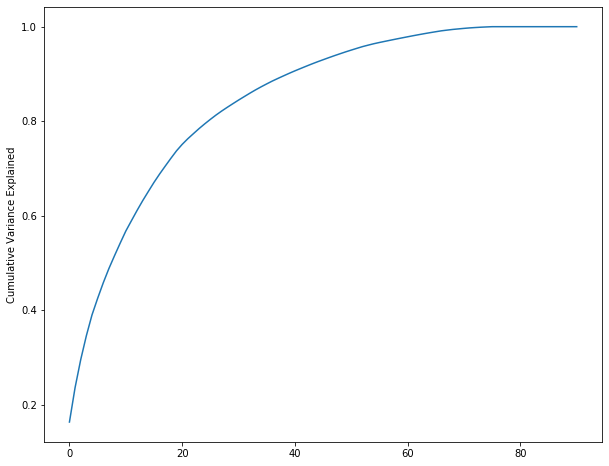

In [ ]:
#PCA
from sklearn.decomposition import PCA

#Apply PCA to train data
pca = PCA(random_state=42)
pca_features = pca.fit(X_train_bal)

#Look at explained variables of PCA components
print(pca_features.components_)
print(pca_features.explained_variance_)


#Feature variance will be selected after as hyperparameter

#Making a Scree Plot
var_cumu = np.cumsum(pca_features.explained_variance_ratio_)
fig = plt.figure(figsize=(10,8))
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance Explained")
plt.show()

In [ ]:
#Apply PCA to train data
#95% of the vairance in data needs to be explained which is better
X_train_index = X_train_bal.index
pca = PCA(0.95, random_state=42)
pca_features_train = pca.fit(X_train_bal)
pca_imp_feats_bal = pd.DataFrame({'Features':X_train.columns, 'PC1':pca_features_train.components_[0]})
pca_imp_feats_df_bal = pca_imp_feats_bal.sort_values(ascending=False, by='PC1')[0:51]['Features']
pca_features_train = pca.fit_transform(X_train_bal)

pca2 = PCA(0.95, random_state=42)
pca_X_train_fit = pca2.fit(X_train)
pca_imp_feats = pd.DataFrame({'Features':X_train.columns, 'PC1':pca_X_train_fit.components_[0]})
pca_imp_feats_df = pca_imp_feats.sort_values(ascending=False, by='PC1')[0:52]['Features']
pca_X_train_fit = pca2.fit_transform(X_train)

# Assign the feature names to the PCA fit dataframe and print it
pca_X_train = pd.DataFrame(pca_X_train_fit, index=X_train.index, columns=pca_imp_feats_df)
pca_X_train

Features,fb_user_7--->1.0,fb_user_6--->1.0,fb_user_8--->1.0,night_pck_user_7--->0.0,night_pck_user_6--->0.0,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_8--->0.0,av_rech_amt_data_6,total_rech_data_7,vol_3g_mb_7,total_rech_data_6,vol_3g_mb_8,total_rech_data_8,vol_3g_mb_6,jul_vbc_3g,aug_vbc_3g,monthly_3g_7,monthly_3g_8,jun_vbc_3g,monthly_3g_6,sachet_2g_7,sachet_2g_6,vol_2g_mb_6,monthly_2g_7,vol_2g_mb_7,monthly_2g_8,monthly_2g_6,sachet_2g_8,vol_2g_mb_8,sachet_3g_7,sachet_3g_6,sachet_3g_8,total_rech_amt_8,night_pck_user_6--->1.0,night_pck_user_7--->1.0,night_pck_user_8--->1.0,total_rech_amt_7,loc_ic_mou_8,loc_ic_mou_7,total_rech_amt_6,loc_ic_mou_6,loc_og_mou_8,isd_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,loc_og_mou_6,aon,loc_og_mou_7,fb_user_6--->0.0,fb_user_7--->0.0,roam_ic_mou_8
29851,-3.174168,-0.857332,-0.231821,1.512714,0.449577,-0.464113,-0.047693,0.593214,0.186065,-2.061787,0.099440,0.167305,-0.629823,-0.278721,0.145500,-0.141139,0.180725,-0.432385,-0.242457,-0.183964,-0.033000,0.076130,-0.170355,-0.088750,-0.190184,-0.031456,0.009537,-0.850209,-0.075122,-0.071011,-0.005657,0.099080,0.022502,0.045093,-0.096356,-0.073886,-0.315744,0.077438,-0.018654,-0.063864,0.003112,-0.015109,-0.030971,-0.049524,-0.112679,0.130770,-0.408230,0.452257,0.365355,0.427259,-1.190239,-0.055130
80213,4.681855,-0.256778,-0.726377,-1.321473,0.026957,-2.355391,-0.332482,-0.240491,0.929542,0.361167,0.684937,0.094321,0.112172,0.064275,-1.610623,-0.563264,-1.472513,-1.175687,-0.370124,-0.163715,-1.652414,0.211952,1.113827,-0.179161,0.122293,0.156395,1.475583,-1.197557,-0.087872,0.102537,0.326504,0.230504,-0.305462,0.097597,0.558277,-0.085184,-0.072927,-0.333589,-0.234950,0.485190,-0.148444,0.282205,0.154042,-0.088745,0.052924,-0.511681,0.338932,0.773578,0.107654,-0.093804,0.257189,0.122196
7957,7.358676,1.341555,-3.784316,2.466116,-0.829469,0.864121,-0.865102,0.003340,-2.059435,0.216948,0.187553,1.011742,0.092494,0.538053,0.486915,0.694663,-0.001959,1.156295,-1.933657,-0.077560,2.863101,0.475279,0.253876,-0.243086,0.558969,-1.038327,2.900514,-0.776872,0.101878,-0.086071,-0.723085,0.000757,0.068000,0.657475,-0.071445,0.448522,0.616966,-0.472436,0.074617,-0.384336,-0.541725,0.037441,-0.985975,-0.288047,0.106452,-0.022449,0.207088,-0.086374,-0.053912,-0.032627,-0.024105,0.121859
74971,-3.202425,-0.616673,-0.194100,1.127197,0.107031,0.128499,-0.680575,0.170775,-0.023235,0.749138,-0.756452,-0.469045,-0.535133,-0.324114,0.290521,0.083074,-0.088276,0.274322,0.242966,-0.279375,0.022519,0.255002,-0.172366,-0.006502,-0.065217,0.104283,0.273247,0.454459,-0.083837,-0.089715,-0.255063,-0.319644,0.283875,0.542226,-0.731163,0.908125,0.617553,-0.387463,-0.047192,0.726378,0.151210,0.141902,0.067334,-0.002676,0.007906,0.006111,0.007350,0.142025,0.184381,-0.078663,0.134929,0.036372
25344,4.083047,-0.219148,1.182967,-1.361453,-0.016266,-4.010100,-1.601337,0.640665,1.890002,0.041146,0.548567,-0.626233,-0.160174,-0.438669,-0.932976,-0.230660,-0.975860,-0.253276,-0.069964,-0.717924,0.189302,0.135255,-0.106908,0.187634,-0.195910,0.183587,0.929304,-0.811213,0.293851,0.234123,0.110343,-0.343819,0.606325,-0.613182,-0.367658,0.070481,-0.057366,-0.832153,-0.471502,0.235277,0.133953,0.038681,-0.103857,-0.259972,0.334587,0.312395,-0.567675,-0.164863,0.195268,0.112712,-0.725564,0.062672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40270,6.496130,-1.830301,2.287062,0.629674,1.036874,0.740744,-0.051828,-0.281486,-1.141557,-0.181025,0.452410,0.509604,0.244101,0.017821,2.119838,0.601159,-0.272195,0.414760,-0.959845,-0.475734,-0.815519,2.022222,0.115995,-0.525110,-1.397403,0.666620,0.202605,1.043889,-1.071137,-1.823609,0.572533,0.237388,0.821445,-0.953724,0.967681,-0.079557,-1.029979,-0.758327,1.079401,-0.954408,0.630191,-0.267839,0.260569,0.066382,0.423318,0.205534,0.023360,0.234298,-0.209491,0.272702,0.182817,-0.217125
81

In [ ]:
# Assign the feature names to the PCA fit dataframe for a balanced dataframe and print it
pca_features_train_df = pd.DataFrame(pca_features_train, index=X_train_index, columns=pca_imp_feats_df_bal)
pca_features_train_df

Features,fb_user_7--->1.0,fb_user_6--->1.0,night_pck_user_7--->0.0,night_pck_user_6--->0.0,fb_user_8--->1.0,av_rech_amt_data_7,night_pck_user_8--->0.0,av_rech_amt_data_6,total_rech_data_7,total_rech_data_6,av_rech_amt_data_8,vol_3g_mb_7,vol_3g_mb_6,total_rech_data_8,vol_3g_mb_8,jul_vbc_3g,monthly_3g_7,monthly_3g_6,sachet_2g_6,sachet_2g_7,jun_vbc_3g,aug_vbc_3g,monthly_3g_8,vol_2g_mb_6,vol_2g_mb_7,sachet_3g_7,monthly_2g_7,sachet_2g_8,monthly_2g_6,sachet_3g_6,monthly_2g_8,vol_2g_mb_8,sachet_3g_8,total_rech_amt_8,loc_ic_mou_8,loc_ic_mou_7,loc_og_mou_8,total_rech_amt_7,loc_ic_mou_6,night_pck_user_7--->1.0,night_pck_user_6--->1.0,loc_og_mou_7,night_pck_user_8--->1.0,loc_og_mou_6,aon,fb_user_6--->0.0,fb_user_7--->0.0,std_ic_mou_8,isd_ic_mou_8,isd_ic_mou_7,isd_ic_mou_6
0,-2.498284,-0.755133,-0.415327,-0.047533,0.722046,-0.172849,0.258173,1.058329,-1.622563,0.777454,0.162780,-0.826728,-0.718912,0.041595,0.419006,0.078742,0.170332,0.264988,-0.032612,0.075001,0.150099,0.233016,0.062493,-0.002133,0.100416,0.276982,-0.084185,-0.103975,0.154898,-0.122886,-0.482437,-0.108247,0.009507,0.211189,0.218720,-0.074942,0.192509,0.187115,0.058267,-0.003119,0.046666,0.205003,-0.184071,0.177424,0.626591,0.426327,1.090984,0.635185,-0.088851,-0.074872,0.001487
1,5.331010,0.659945,-0.152552,1.128886,-1.088069,-1.721992,0.991347,0.155848,0.405952,0.814943,-1.290544,0.014871,0.729619,-0.099922,0.833873,-0.535421,-1.343318,0.110210,-0.168495,-1.690470,-0.053964,0.676743,1.614248,-1.050051,-0.203031,0.976449,-0.252593,0.511048,1.513071,0.578157,-0.588784,-0.968849,-0.643787,-0.135153,0.142975,0.547650,0.318323,0.231236,0.186211,-0.446118,0.240924,0.548497,-0.021645,0.116684,0.102934,-0.402112,-0.276999,0.216621,-0.697634,0.354240,0.134408
2,7.881377,0.433644,-0.354942,3.842908,3.505688,-0.069856,-0.703307,-0.041541,-0.143798,-2.020557,0.314428,0.085985,0.046751,0.453160,0.361915,-0.069021,1.361996,0.366370,0.187175,0.351376,-1.398746,0.496904,-2.012563,2.632887,0.036707,-0.253796,-1.068739,-0.109283,2.296350,1.252344,-0.207399,-0.562903,-0.405297,0.274519,-0.799419,0.112200,-0.485534,1.028115,-0.400037,0.261414,0.246726,0.606365,0.266704,-0.267649,-0.123700,-0.038559,-0.204825,-0.168906,-0.429941,-0.916381,-0.218510
3,-2.476148,-0.806650,-0.148715,0.066320,0.542739,0.031330,-0.640629,0.299106,1.132531,0.354912,0.411258,-0.330331,-0.264415,-0.400911,0.351135,0.304639,0.405354,0.149063,-0.138239,0.147618,0.097604,-0.221773,0.427181,0.299567,0.311963,-0.442233,-1.131777,-0.020363,-0.531627,0.476734,0.251990,0.063952,-0.383588,-0.274419,0.012787,0.223664,-1.049361,0.458052,0.232712,-0.031058,0.034402,-0.015552,-0.091437,0.198734,0.122401,0.032388,-0.118339,-0.095687,0.026558,-0.008880,0.014392
4,4.858450,-0.199406,1.125633,-0.295168,-1.267528,-3.115772,1.747411,0.925743,0.928282,2.438744,-1.612180,-0.404433,0.489509,-0.681905,0.839782,0.766311,-0.589596,0.076151,-0.504321,-1.195153,0.353935,0.126286,0.367677,0.263445,0.303197,-0.050734,-0.633830,0.217926,0.617011,0.435326,-0.915233,-0.673685,0.050909,-0.150017,0.398610,0.786368,0.137459,0.211980,0.027084,-0.008196,0.114662,0.033919,-0.002345,0.020826,0.258825,0.109799,0.620940,0.105350,0.598635,-0.751957,0.365493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43897,-2.742777,0.717251,0.851601,0.150428,0.532286,-0.037952,-0.252846,-0.757701,0.807845,0.066259,0.582054,-0.344298,0.126654,-0.518269,-1.571576,0.391034,-0.399000,0.180875,0.509264,0.127957,-0.030353,0.026276,-0.452835,-1.214222,0.377096,-1.904292,0.638217,-0.218798,-0.177120,0.583175,1.248608,0.030468,-0.064098,-0.352889,-0.445927,0.101766,0.339948,0.215013,-0.175037,-0.028523,-0.051237,-0.338883,0.075369,0.201855,0.097802,0.346922,-0.213899,-0.273956,0.276626,-0.048462,0.116897
43898,-3.195258,11.638951,-3.956564,-1.190474,-0.811011,0.103007,-0.843271,-0.009168,0.202683,-0.013456,-0.395198,0.49

### Logistic Regression

#### Without Hyperparameter Tuning and with PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(pca_features_train, y_train_bal)

In [ ]:
y_train_pred_prob_poc_logreg = pd.Series(model_pca.predict_proba(pca_features_train)[:,1], name='y_train_predicted_probabililty_churn', index=X_train_bal.index)
y_train_pred_prob_poc_logreg

0        0.422610
1        0.064974
2        0.103367
3        0.200280
4        0.015498
           ...   
43897    0.723533
43898    0.945464
43899    0.776965
43900    0.346262
43901    0.300949
Name: y_train_predicted_probabililty_churn, Length: 43902, dtype: float64

In [ ]:
#, 'Predicted_train_y':y_train_pred_poc_logreg
y_train_act_vs_pred_mod_poc_logreg = pd.DataFrame({'Actual_train_y':y_train_bal,'Prob_Predicted_train_y':y_train_pred_prob_poc_logreg})
y_train_act_vs_pred_mod_poc_logreg

,Actual_train_y,Prob_Predicted_train_y
0,0,0.422610
1,0,0.064974
2,0,0.103367
3,0,0.200280
4,0,0.015498
...,...,...
43897,1,0.723533
43898,1,0.945464
43899,1,0.776965
43900,1,0.346262


In [ ]:
y_train_act_vs_pred_mod_poc_logreg['Predicted_y'] = y_train_act_vs_pred_mod_poc_logreg['Prob_Predicted_train_y'].map(lambda x : 1 if x>0.5 else 0)

#Calculate recall_score (which is also aclled Sensitivity)
print("The Sensitivity score for a threshold value 0.5 is "+str(metrics.recall_score(y_train_act_vs_pred_mod_poc_logreg['Actual_train_y'], y_train_act_vs_pred_mod_poc_logreg['Predicted_y'])))
print("\nThe accuracy score is "+str(accuracy_score(y_train_act_vs_pred_mod_poc_logreg['Actual_train_y'], y_train_act_vs_pred_mod_poc_logreg['Predicted_y'])))

The Sensitivity score for a threshold value 0.5 is 0.8471595827069381

The accuracy score is 0.8332649993166599


In [ ]:
cut_off_df = pd.DataFrame(columns=['Probability','Accuracy','Specificity', 'Sensitivity'])

num=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in num:
    y_train_act_vs_pred_mod_poc_logreg[i] = y_train_act_vs_pred_mod_poc_logreg['Prob_Predicted_train_y'].map(lambda x : 1 if x>i else 0)

for i in num:
    conf_mat = metrics.confusion_matrix(y_train_act_vs_pred_mod_poc_logreg['Actual_train_y'], y_train_act_vs_pred_mod_poc_logreg[i])
    TP = conf_mat[1,1]
    TN = conf_mat[0,0]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    total = sum(sum(conf_mat))
    accuracy=(TP+TN)/total
    speci = TN/(TN+FP)
    sensi = TP/(FN+TP)
    cut_off_df.loc[i] = [i, accuracy, speci, sensi]
cut_off_df

,Probability,Accuracy,Specificity,Sensitivity
0.0,0.0,0.500000,0.000000,1.000000
0.1,0.1,0.682839,0.390324,0.975354
0.2,0.2,0.748941,0.548358,0.949524
0.3,0.3,0.792470,0.660835,0.924104
0.4,0.4,0.819803,0.747984,0.891622
0.5,0.5,0.833265,0.819370,0.847160
0.6,0.6,0.836431,0.876407,0.796456
0.7,0.7,0.823083,0.917088,0.729078
0.8,0.8,0.771810,0.948613,0.595007
0.9,0.9,0.613844,0.979955,0.247734


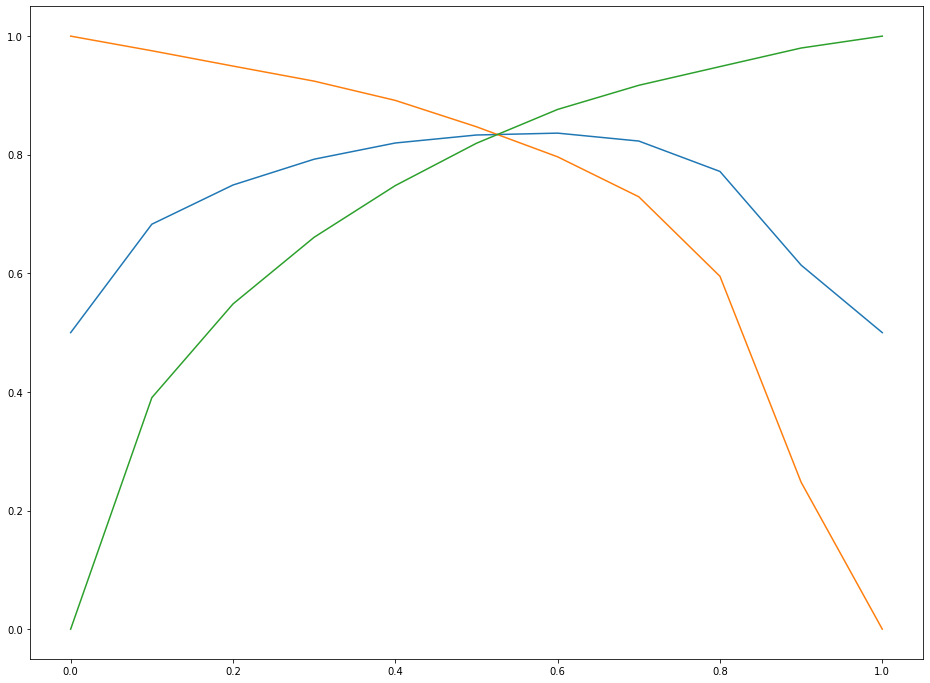

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(cut_off_df['Probability'], cut_off_df['Accuracy'])
plt.plot(cut_off_df['Probability'], cut_off_df['Sensitivity'])
plt.plot(cut_off_df['Probability'], cut_off_df['Specificity'])
plt.show()

In [ ]:
y_train_act_vs_pred_mod_poc_logreg['Predicted_y'] = y_train_act_vs_pred_mod_poc_logreg['Prob_Predicted_train_y'].map(lambda x : 1 if x>0.524 else 0)

#Calculate recall_score (which is also aclled Sensitivity)
print("The Sensitivity score for a threshold value 0.524 is "+str(metrics.recall_score(y_train_act_vs_pred_mod_poc_logreg['Actual_train_y'], y_train_act_vs_pred_mod_poc_logreg['Predicted_y'])))
print("\nThe accuracy score is "+str(accuracy_score(y_train_act_vs_pred_mod_poc_logreg['Actual_train_y'], y_train_act_vs_pred_mod_poc_logreg['Predicted_y'])))

The Sensitivity score for a threshold value 0.524 is 0.8344950116167829

The accuracy score is 0.8341077855222997


In [ ]:
pca_features_test = pca.transform(X_test) 
pca_features_test_df = pd.DataFrame(pca_features_test)


In [ ]:
y_test_pred_prob_poc_logreg = pd.Series(model_pca.predict_proba(pca_features_test)[:,1], name='y_test_predicted_churn_prob', index=X_test.index)
print(len(y_test_pred_prob_poc_logreg.index))
y_test_pred_prob_poc_logreg

5996


76438    0.001020
72869    0.097745
86053    0.110398
29093    0.532248
96385    0.876043
           ...   
92862    0.012281
37409    0.043856
33437    0.513625
13361    0.014545
93530    0.274778
Name: y_test_predicted_churn_prob, Length: 5996, dtype: float64

In [ ]:

y_test_act_vs_pred_mod_poc_logreg = pd.DataFrame({'Actual_test_y':y_test,'Prob_Predicted_test_y':y_test_pred_prob_poc_logreg})
y_test_act_vs_pred_mod_poc_logreg


,Actual_test_y,Prob_Predicted_test_y
76438,0,0.001020
72869,0,0.097745
86053,0,0.110398
29093,0,0.532248
96385,0,0.876043
...,...,...
92862,0,0.012281
37409,0,0.043856
33437,0,0.513625
13361,1,0.014545


In [ ]:
y_test_act_vs_pred_mod_poc_logreg['Predicted_test_y'] = y_test_act_vs_pred_mod_poc_logreg['Prob_Predicted_test_y'].map(lambda x : 1 if x>0.524 else 0)
print(y_test_act_vs_pred_mod_poc_logreg)

#Calculate recall_score (which is also aclled Sensitivity)
print("The Sensitivity score for a threshold value 0.524 is "+str(metrics.recall_score(y_test_act_vs_pred_mod_poc_logreg['Actual_test_y'], y_test_act_vs_pred_mod_poc_logreg['Predicted_test_y'])))
print("\nThe accuracy score is "+str(accuracy_score(y_test_act_vs_pred_mod_poc_logreg['Actual_test_y'], y_test_act_vs_pred_mod_poc_logreg['Predicted_test_y'])))

       Actual_test_y  Prob_Predicted_test_y  Predicted_test_y
76438              0               0.001020                 0
72869              0               0.097745                 0
86053              0               0.110398                 0
29093              0               0.532248                 1
96385              0               0.876043                 1
...              ...                    ...               ...
92862              0               0.012281                 0
37409              0               0.043856                 0
33437              0               0.513625                 0
13361              1               0.014545                 0
93530              0               0.274778                 0

[5996 rows x 3 columns]
The Sensitivity score for a threshold value 0.524 is 0.7971274685816876

The accuracy score is 0.8280520346897932


In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

cm1 = confusion_matrix(y_train_act_vs_pred_mod_poc_logreg['Actual_train_y'], y_train_act_vs_pred_mod_poc_logreg['Predicted_y'])
print('Confusion Matrix of train: \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy train : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity train : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity train : ', specificity1)


cm2 = confusion_matrix(y_test_act_vs_pred_mod_poc_logreg['Actual_test_y'], y_test_act_vs_pred_mod_poc_logreg['Predicted_test_y'])
print('Confusion Matrix of test: \n', cm2)

total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy test : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity test : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity test : ', specificity1)

Confusion Matrix of train: 
 [[18301  3650]
 [ 3633 18318]]
Accuracy train :  0.8341077855222997
Sensitivity train :  0.8337205594278165
Specificity train :  0.8344950116167829
Confusion Matrix of test: 
 [[4521  918]
 [ 113  444]]
Accuracy test :  0.8280520346897932
Sensitivity test :  0.8312189740761169
Specificity test :  0.7971274685816876


##### With Hyperparameter Tuning and PCA

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

#Create cross-validation scheme
folds = KFold(n_splits = 5, shuffle=True, random_state = 42)

#Specify range of hyperparameter
hyper_params = [{'n_features_to_select':list(range(10,50))}]

#Perform Grid Search
learner_pca = LogisticRegression(class_weight="balanced")
learner_pca.fit(pca_X_train, y_train)
rfe_hp = RFE(learner_pca)

model_cv = GridSearchCV(estimator=rfe_hp, param_grid=hyper_params, scoring='accuracy', cv=folds, verbose=1)

In [ ]:
#Fit model
model_cv.fit(pca_X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 37.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight='balanced',
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='warn',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='warn',
                     

In [ ]:
model_cv.best_score_

0.8071550681732894

In [ ]:
model_cv.cv_results_

{'mean_fit_time': array([15.11020136, 15.24699893, 14.39620051, 14.47200637, 14.23720798,
        15.36040564, 14.42880158, 14.28280058, 13.97060051, 13.87159963,
        14.07364025, 13.7448668 , 13.99320059, 13.51084962, 13.35497451,
        13.0695992 , 12.98667049, 12.73240042, 12.77599864, 12.44959946,
        12.16640005, 11.80500107, 11.77139955, 11.30179887, 11.66780019,
        10.80700483, 10.19040074,  9.834199  ,  9.55940032,  9.23779869,
         8.50680075,  7.92060061,  7.40879941,  6.84560213,  6.15620508,
         5.66680007,  4.80519867,  4.2666008 ,  3.37332573,  2.89139953]),
 'std_fit_time': array([1.37313246, 1.0923532 , 1.42187841, 1.05111308, 1.26578406,
        2.13846428, 1.34861163, 1.24820246, 1.1609584 , 1.47605466,
        1.35767506, 1.3011638 , 1.49540143, 1.40846579, 1.22409463,
        1.16116564, 1.21055418, 1.12281139, 1.1971569 , 1.38115106,
        1.45709687, 1.40439031, 1.25787497, 1.39620815, 1.3191349 ,
        1.11682983, 1.1476137 , 1.2966852

In [ ]:
lg_best_fit = model_cv.best_estimator_
lg_best_fit

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=49, step=1, verbose=0)

In [ ]:
lg_best_fit.estimator_.coef_

array([[-0.16050855, -0.30385203, -0.02274426,  0.42450138,  0.20192917,
        -0.17471852,  0.02542558, -0.27775775, -0.07681107,  0.02927149,
        -0.32533113,  0.2912679 ,  0.19877264, -0.12197782, -0.06901179,
         0.04234369,  0.06872685,  0.04530086,  0.43028085,  0.03843026,
        -0.91776182, -0.39296136, -2.09447833,  0.04179535,  0.07347569,
        -0.62837019, -0.70667119, -0.32864199,  0.49786663, -2.50186267,
        -2.06827021, -0.48661708,  0.34783008, -0.13678917,  0.55833634,
         0.42697714, -0.63058772,  0.10761121,  0.17790703,  0.0473544 ,
        -0.14212348,  0.18125316,  0.19695451, -0.19607134,  0.12633522,
         0.04481532,  0.04598994,  0.20029248,  1.21426815]])

In [ ]:
pca_features_test = pca2.transform(X_test) 
pca_features_test_df = pd.DataFrame(pca_features_test)
y_test_pred = lg_best_fit.predict(pca_features_test_df)
accuracy_score(y_test,y_test_pred)

0.8107071380920614

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

cm1 = confusion_matrix(y_train,y_train_pred)
print('Confusion Matrix of train: \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy train : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity train : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity train : ', specificity1)


cm2 = confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix of test: \n', cm2)

total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy test : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity test : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity test : ', specificity1)

Confusion Matrix of train: 
 [[17706  4245]
 [  350  1682]]
Accuracy train :  0.8084059542175708
Sensitivity train :  0.8066147328139948
Specificity train :  0.827755905511811
Confusion Matrix of test: 
 [[4401 1038]
 [  97  460]]
Accuracy test :  0.8107071380920614
Sensitivity test :  0.8091560948703805
Specificity test :  0.8258527827648114


In [ ]:
imp_df = pd.DataFrame({
    "Varname": pca_imp_feats.sort_values(ascending=False, by='PC1')[0:49]['Features'],
    "Imp": lg_best_fit.estimator_.coef_[0] 
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
13,loc_og_mou_7,1.214268
74,night_pck_user_6--->1.0,0.558336
62,sachet_2g_8,0.497867
65,monthly_3g_8,0.430281
77,night_pck_user_7--->1.0,0.426977
76,night_pck_user_7--->0.0,0.424501
68,sachet_3g_8,0.347830
45,total_rech_data_6,0.291268
73,night_pck_user_6--->0.0,0.201929
69,aon,0.200292


### Decision Tree

##### Without Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Instansiate
dt1 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=10, class_weight="balanced")

#Fit the Decision Tree Model
dt1.fit(pca_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import r2_score

y_train_pred = dt1.predict(pca_X_train)
accuracy_score(y_train,y_train_pred)

0.8428053204353083

In [ ]:
pca_features_test = pca2.transform(X_test) 
pca_features_test_df = pd.DataFrame(pca_features_test)
y_test_pred = dt1.predict(pca_features_test_df)
accuracy_score(y_test,y_test_pred)

0.8007004669779854

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

cm1 = confusion_matrix(y_train,y_train_pred)
print('Confusion Matrix of train: \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy train : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity train : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity train : ', specificity1)


cm2 = confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix of test: \n', cm2)

total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy test : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity test : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity test : ', specificity1)

Confusion Matrix of train: 
 [[18315  3636]
 [  134  1898]]
Accuracy train :  0.8428053204353083
Sensitivity train :  0.8343583435834359
Specificity train :  0.9340551181102362
Confusion Matrix of test: 
 [[4419 1020]
 [ 175  382]]
Accuracy test :  0.8007004669779854
Sensitivity test :  0.8124655267512411
Specificity test :  0.6858168761220825


#### With Hyperparameter Tuning

In [ ]:
#Instansiate
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=10, class_weight="balanced")

#Parameters for Hyperparameter Tuning
params = {'max_depth':[10, 20, 50, 100],
          'min_samples_leaf':[5,10,20,50,100,500]
          }

#Instantiate the gridsearch model
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=1, verbose=1, scoring="accuracy")

In [ ]:
pca_X_train

Features,fb_user_7--->1.0,fb_user_6--->1.0,fb_user_8--->1.0,night_pck_user_7--->0.0,night_pck_user_6--->0.0,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_8--->0.0,av_rech_amt_data_6,total_rech_data_7,vol_3g_mb_7,total_rech_data_6,vol_3g_mb_8,total_rech_data_8,vol_3g_mb_6,jul_vbc_3g,aug_vbc_3g,monthly_3g_7,monthly_3g_8,jun_vbc_3g,monthly_3g_6,sachet_2g_7,sachet_2g_6,vol_2g_mb_6,monthly_2g_7,vol_2g_mb_7,monthly_2g_8,monthly_2g_6,sachet_2g_8,vol_2g_mb_8,sachet_3g_7,sachet_3g_6,sachet_3g_8,total_rech_amt_8,night_pck_user_6--->1.0,night_pck_user_7--->1.0,night_pck_user_8--->1.0,total_rech_amt_7,loc_ic_mou_8,loc_ic_mou_7,total_rech_amt_6,loc_ic_mou_6,loc_og_mou_8,isd_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,loc_og_mou_6,aon,loc_og_mou_7,fb_user_6--->0.0,fb_user_7--->0.0,roam_ic_mou_8
29851,-3.174168,-0.857332,-0.231821,1.512714,0.449577,-0.464113,-0.047693,0.593214,0.186065,-2.061787,0.099440,0.167305,-0.629823,-0.278721,0.145500,-0.141139,0.180725,-0.432385,-0.242457,-0.183964,-0.033000,0.076130,-0.170355,-0.088750,-0.190184,-0.031456,0.009537,-0.850209,-0.075122,-0.071011,-0.005657,0.099080,0.022502,0.045093,-0.096356,-0.073886,-0.315744,0.077438,-0.018654,-0.063864,0.003112,-0.015109,-0.030971,-0.049524,-0.112679,0.130770,-0.408230,0.452257,0.365355,0.427259,-1.190239,-0.055130
80213,4.681855,-0.256778,-0.726377,-1.321473,0.026957,-2.355391,-0.332482,-0.240491,0.929542,0.361167,0.684937,0.094321,0.112172,0.064275,-1.610623,-0.563264,-1.472513,-1.175687,-0.370124,-0.163715,-1.652414,0.211952,1.113827,-0.179161,0.122293,0.156395,1.475583,-1.197557,-0.087872,0.102537,0.326504,0.230504,-0.305462,0.097597,0.558277,-0.085184,-0.072927,-0.333589,-0.234950,0.485190,-0.148444,0.282205,0.154042,-0.088745,0.052924,-0.511681,0.338932,0.773578,0.107654,-0.093804,0.257189,0.122196
7957,7.358676,1.341555,-3.784316,2.466116,-0.829469,0.864121,-0.865102,0.003340,-2.059435,0.216948,0.187553,1.011742,0.092494,0.538053,0.486915,0.694663,-0.001959,1.156295,-1.933657,-0.077560,2.863101,0.475279,0.253876,-0.243086,0.558969,-1.038327,2.900514,-0.776872,0.101878,-0.086071,-0.723085,0.000757,0.068000,0.657475,-0.071445,0.448522,0.616966,-0.472436,0.074617,-0.384336,-0.541725,0.037441,-0.985975,-0.288047,0.106452,-0.022449,0.207088,-0.086374,-0.053912,-0.032627,-0.024105,0.121859
74971,-3.202425,-0.616673,-0.194100,1.127197,0.107031,0.128499,-0.680575,0.170775,-0.023235,0.749138,-0.756452,-0.469045,-0.535133,-0.324114,0.290521,0.083074,-0.088276,0.274322,0.242966,-0.279375,0.022519,0.255002,-0.172366,-0.006502,-0.065217,0.104283,0.273247,0.454459,-0.083837,-0.089715,-0.255063,-0.319644,0.283875,0.542226,-0.731163,0.908125,0.617553,-0.387463,-0.047192,0.726378,0.151210,0.141902,0.067334,-0.002676,0.007906,0.006111,0.007350,0.142025,0.184381,-0.078663,0.134929,0.036372
25344,4.083047,-0.219148,1.182967,-1.361453,-0.016266,-4.010100,-1.601337,0.640665,1.890002,0.041146,0.548567,-0.626233,-0.160174,-0.438669,-0.932976,-0.230660,-0.975860,-0.253276,-0.069964,-0.717924,0.189302,0.135255,-0.106908,0.187634,-0.195910,0.183587,0.929304,-0.811213,0.293851,0.234123,0.110343,-0.343819,0.606325,-0.613182,-0.367658,0.070481,-0.057366,-0.832153,-0.471502,0.235277,0.133953,0.038681,-0.103857,-0.259972,0.334587,0.312395,-0.567675,-0.164863,0.195268,0.112712,-0.725564,0.062672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40270,6.496130,-1.830301,2.287062,0.629674,1.036874,0.740744,-0.051828,-0.281486,-1.141557,-0.181025,0.452410,0.509604,0.244101,0.017821,2.119838,0.601159,-0.272195,0.414760,-0.959845,-0.475734,-0.815519,2.022222,0.115995,-0.525110,-1.397403,0.666620,0.202605,1.043889,-1.071137,-1.823609,0.572533,0.237388,0.821445,-0.953724,0.967681,-0.079557,-1.029979,-0.758327,1.079401,-0.954408,0.630191,-0.267839,0.260569,0.066382,0.423318,0.205534,0.023360,0.234298,-0.209491,0.272702,0.182817,-0.217125
81

In [ ]:
grid_search.fit(pca_X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  1.6min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=10,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
      

In [ ]:
grid_search.best_score_

0.8530625859984156

In [ ]:
dt_best_fit = grid_search.best_estimator_
dt_best_fit

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [ ]:
dt_best_fit.feature_importances_

array([0.03519739, 0.02120815, 0.00984382, 0.14902523, 0.0533706 ,
       0.01019776, 0.01920606, 0.01450581, 0.00712685, 0.01815993,
       0.00986102, 0.06887087, 0.00537898, 0.0100099 , 0.00624277,
       0.01153564, 0.01089813, 0.01095359, 0.00726316, 0.11965734,
       0.00381861, 0.0054672 , 0.02091487, 0.00803479, 0.01874831,
       0.01423757, 0.01968094, 0.02508098, 0.01201832, 0.00710073,
       0.01970741, 0.02408539, 0.00874705, 0.00914333, 0.00715549,
       0.01793943, 0.02363531, 0.01483132, 0.01315953, 0.01529139,
       0.00635253, 0.01141287, 0.00725264, 0.00677836, 0.00416009,
       0.01201502, 0.01149799, 0.00591715, 0.01386036, 0.01165779,
       0.00817488, 0.01360936])

In [ ]:
from sklearn.metrics import r2_score

y_train_pred = dt_best_fit.predict(pca_X_train)
accuracy_score(y_train,y_train_pred)

0.9421673685527249

In [ ]:
pca_features_test = pca2.transform(X_test) 
pca_features_test_df = pd.DataFrame(pca_features_test)
y_test_pred = dt_best_fit.predict(pca_features_test_df)
accuracy_score(y_test,y_test_pred)

0.8559039359573049

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

cm1 = confusion_matrix(y_train,y_train_pred)
print('Confusion Matrix of train: \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy train : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity train : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity train : ', specificity1)


cm2 = confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix of test: \n', cm2)

total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy test : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity test : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity test : ', specificity1)

Confusion Matrix of train: 
 [[20564  1387]
 [    0  2032]]
Accuracy train :  0.9421673685527249
Sensitivity train :  0.9368138125825702
Specificity train :  1.0
Confusion Matrix of test: 
 [[4864  575]
 [ 289  268]]
Accuracy test :  0.8559039359573049
Sensitivity test :  0.89428203713918
Specificity test :  0.48114901256732495


In [ ]:
imp_df_decision_tree = pd.DataFrame({
    "Varname": pca_X_train.columns,
    "Imp": dt_best_fit.feature_importances_
})

In [ ]:
imp_df_decision_tree.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,night_pck_user_7--->0.0,0.149025
19,jun_vbc_3g,0.119657
11,total_rech_data_6,0.068871
4,night_pck_user_6--->0.0,0.053371
0,fb_user_7--->1.0,0.035197
27,monthly_2g_6,0.025081
31,sachet_3g_6,0.024085
36,night_pck_user_8--->1.0,0.023635
1,fb_user_6--->1.0,0.021208
22,sachet_2g_6,0.020915


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Without Hyperparameter Tuning

In [ ]:
#Instantiate
rf1 = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, class_weight="balanced",warm_start=True)

In [ ]:
%%time
rf1.fit(pca_X_train, y_train)

Wall time: 439 ms


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=True)

In [ ]:
pca_features_test = pca2.transform(X_test) 
pca_features_test_df = pd.DataFrame(pca_features_test)

In [ ]:
y_train_pred = rf1.predict(pca_X_train)
y_test_pred = rf1.predict(pca_features_test_df)

In [ ]:
print("Accuracy score of train data is :"+str(accuracy_score(y_train, y_train_pred)))
print("Accuracy score of test data is :"+str(accuracy_score(y_test, y_test_pred)))

Accuracy score of train data is :0.7549514239252804
Accuracy score of test data is :0.7628418945963976


In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

cm1 = confusion_matrix(y_train,y_train_pred)
print('Confusion Matrix of train: \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy train : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity train : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity train : ', specificity1)


cm2 = confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix of test: \n', cm2)

total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy test : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity test : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity test : ', specificity1)

Confusion Matrix of train: 
 [[16497  5454]
 [  423  1609]]
Accuracy train :  0.7549514239252804
Sensitivity train :  0.7515375153751538
Specificity train :  0.7918307086614174
Confusion Matrix of test: 
 [[4124 1315]
 [ 107  450]]
Accuracy test :  0.7628418945963976
Sensitivity test :  0.7582276153704726
Specificity test :  0.8078994614003591


##### With Hyperparameter Tuning

In [ ]:
#Instantiate
rf2 = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, class_weight="balanced")

#Parameters for Hyperparameter Tuning
params = {'max_depth':[10,20],
          'max_features':[45,50],
          'n_estimators':[20,30]
          }



#Instantiate the gridsearch model
grid_search = GridSearchCV(estimator=rf2, param_grid=params, cv=4, n_jobs=1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(pca_X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  7.7min finished


Wall time: 8min 7s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='w

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features=45,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
y_train_pred_hp = rf_best.predict(pca_X_train)
y_test_pred_hp = rf_best.predict(pca_features_test_df)

In [ ]:
print("Accuracy score of train data is :"+str(accuracy_score(y_train, y_train_pred_hp)))
print("Accuracy score of test data is :"+str(accuracy_score(y_test, y_test_pred_hp)))

Accuracy score of train data is :0.9804444815077347
Accuracy score of test data is :0.9141094062708472


In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

cm1 = confusion_matrix(y_train,y_train_pred_hp)
print('Confusion Matrix of train: \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy train : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity train : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity train : ', specificity1)


cm2 = confusion_matrix(y_test,y_test_pred_hp)
print('Confusion Matrix of test: \n', cm2)

total1=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy test : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity test : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity test : ', specificity1)

Confusion Matrix of train: 
 [[21523   428]
 [   41  1991]]
Accuracy train :  0.9804444815077347
Sensitivity train :  0.9805020272424947
Specificity train :  0.9798228346456693
Confusion Matrix of test: 
 [[5255  184]
 [ 331  226]]
Accuracy test :  0.9141094062708472
Sensitivity test :  0.9661702518845376
Specificity test :  0.40574506283662476


In [ ]:
rf_best.feature_importances_
imp_df_rf = pd.DataFrame({'Var_Name':pca_X_train.columns, 'Importance':rf_best.feature_importances_})


In [ ]:
imp_df_rf.sort_values(by='Importance', ascending=False)

,Var_Name,Importance
3,night_pck_user_7--->0.0,0.138203
19,jun_vbc_3g,0.119772
11,total_rech_data_6,0.063168
4,night_pck_user_6--->0.0,0.040125
0,fb_user_7--->1.0,0.033928
1,fb_user_6--->1.0,0.026906
30,sachet_3g_7,0.026582
27,monthly_2g_6,0.023093
24,monthly_2g_7,0.022873
34,night_pck_user_6--->1.0,0.019000


### Model Selection 

I would suggest we go for Logistic regression With Hyperparameter Tuning and PCA model as it has 81% accuracy and 81 % sensitivity(TPR) and 82% sensitivity(TNR).


This is fairly a decent model. You are able to engage with 81% of the customers who will churn. You are missing 19% for sure. Out of all the customers who are predicted to churn, you have 18% who are incorrectly predicted as churned. If the goal is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as 'Not churned,' as it does not cause any negative problem. It could potentially make them even happier for the extra love they are getting. This is the kind of model that can add value from day one. 

### Model Analysis

### Suggestions to the company